In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,mean_squared_error
import pickle
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(rc={'figure.figsize':(8,8)})

<font size="+3" color='#540b11'><b>1. Data Cleaning </b></font>

In [3]:
data=pd.read_csv('CarPrice_Assignment.csv')

In [4]:
data.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

## Drop Car Id 

In [5]:
data=data.drop(['car_ID'],axis=1)

In [6]:
type(data['carwidth'][0])

numpy.float64

## Extracting car company from car name

In [7]:
Company = data['CarName'].apply(lambda x : x.split(' ')[0])
data.insert(3, "Company", Company)
# carPrice.drop(['CarName'], axis=1, inplace=True)


## Handling Duplicate Values In Car Name and Correction Of Drivewheel Data

* nissan and Nissan are same
* toyota and toyouta are same 
* vokswagen , volkswagen and vw are same
* mazda and maxda are same
* porcshce and porsche are same

In [37]:
data['Company'].replace('porcshce','porsche',inplace=True)
data['Company'].replace('maxda', 'mazda', inplace = True)
data['Company'].replace('vokswagen','volkswagen',inplace=True)
data['Company'].replace('toyouta','toyota',inplace=True)
data['Company'].replace('vw','volkswagen', inplace=True)
data['Company'].replace('Nissan', 'nissan', inplace=True)
data['drivewheel'].replace('4wd','fwd',inplace=True)
uniqueCarCompany = data['Company'].unique()
print(uniqueCarCompany)
len(uniqueCarCompany)

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


22

* Inference : There are total 22 unique company of cars in the data set.

In [38]:
data.head(2)

symboling              CarName fueltype      Company aspiration doornumber  \
0         3   alfa-romero giulia      gas  alfa-romero        std        two   
1         3  alfa-romero stelvio      gas  alfa-romero        std        two   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0

In [39]:
data['symboling']=data['symboling'].astype('str')

# Categorical Columns

In [40]:
categorical_cols=data.select_dtypes(include=['object']).columns

In [41]:
data[categorical_cols].head(2)

symboling              CarName fueltype      Company aspiration doornumber  \
0         3   alfa-romero giulia      gas  alfa-romero        std        two   
1         3  alfa-romero stelvio      gas  alfa-romero        std        two   

       carbody drivewheel enginelocation enginetype cylindernumber fuelsystem  
0  convertible        rwd          front       dohc           four       mpfi  
1  convertible        rwd          front       dohc           four       mpfi

## Numerical columns 

In [42]:
numerical_cols=data.select_dtypes(exclude=['object']).columns

In [43]:
data[numerical_cols].head(2)

wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
0       88.6      168.8      64.1       48.8        2548         130   
1       88.6      168.8      64.1       48.8        2548         130   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0

<font size="+3" color='#540b11'><b>2. Exploratory Data Analysis </b></font>

In [44]:
data.describe()

wheelbase   carlength    carwidth   carheight   curbweight  \
count  205.000000  205.000000  205.000000  205.000000   205.000000   
mean    98.756585  174.049268   65.907805   53.724878  2555.565854   
std      6.021776   12.337289    2.145204    2.443522   520.680204   
min     86.600000  141.100000   60.300000   47.800000  1488.000000   
25%     94.500000  166.300000   64.100000   52.000000  2145.000000   
50%     97.000000  173.200000   65.500000   54.100000  2414.000000   
75%    102.400000  183.100000   66.900000   55.500000  2935.000000   
max    120.900000  208.100000   72.300000   59.800000  4066.000000   

       enginesize   boreratio      stroke  compressionratio  horsepower  \
count  205.000000  205.000000  205.000000        205.000000  205.000000   
mean   126.907317    3.329756    3.255415         10.142537  104.117073   
std     41.642693    0.270844    0.313597          3.972040   39.544167   
min     61.000000    2.540000    2.070000          7.000000   48.000000   
25%     97.000000    3.150000    3.110000          8.600000   70.000000   
50%    120.000000    3.310000    3.290000          9.000000   95.000000   
75%    141.000000    3.580000    3.410000          9.400000  116.000000   
max    326.000000    3.940000    4.170000         23.000000  288.000000   

           peakrpm     citympg  highwaympg         price  
count   205.000000  205.000000  205.000000    205.000000  
mean   5125.121951   25.219512   30.751220  13276.710571  
std     476.985643    6.542142    6.886443   7988.852332  
min    4150.000000   13.000000   16.000000   5118.000000  
25%    4800.000000   19.000000   25.000000   7788.000000  
50%    5200.000000   24.000000   30.000000  10295.000000  
75%    5500.000000   30.000000   34.000000  16503.000000  
max    6600.000000   49.000000   54.000000  45400.000000

# Visualise Different Car Names 

Text(0, 0.5, 'Count')

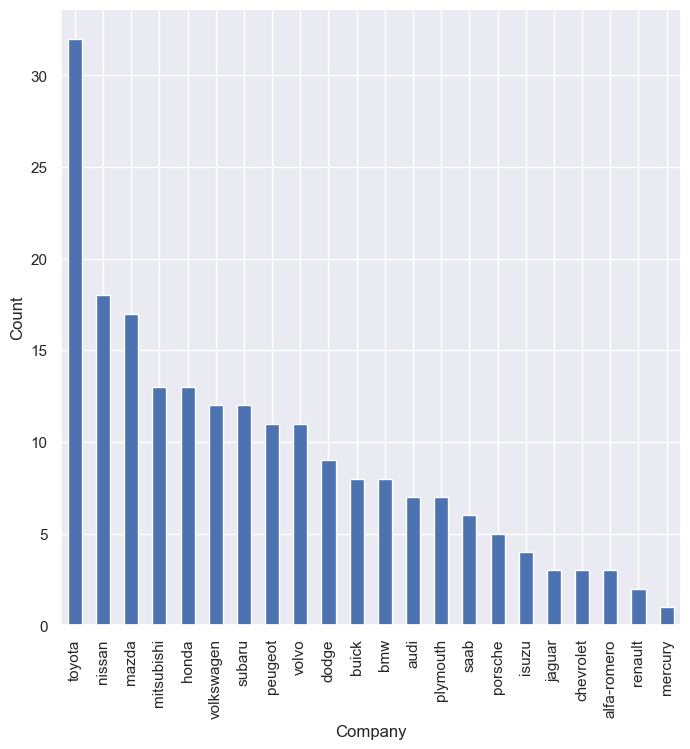

In [45]:
data['Company'].value_counts().plot(kind='bar')
plt.ylabel('Count')

According to the dataset-
* Toyota is the most suitable car 
* mercury is the least suitable car

# Fuel type Ratio

Text(0.5, 1.0, 'Fuel Type Ratio')

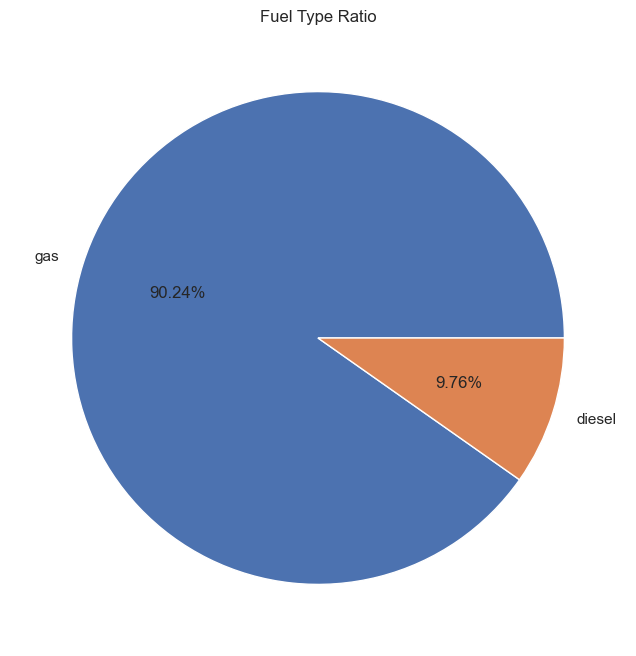

In [46]:
data['fueltype'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.ylabel('')
plt.title('Fuel Type Ratio')

* Most of the car has gas fuel 

# Price Distribution Of Cars

C:\Users\ajit7\AppData\Local\Temp\ipykernel_18044\541847524.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'],kde=True)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na

<Axes: xlabel='price', ylabel='Density'>

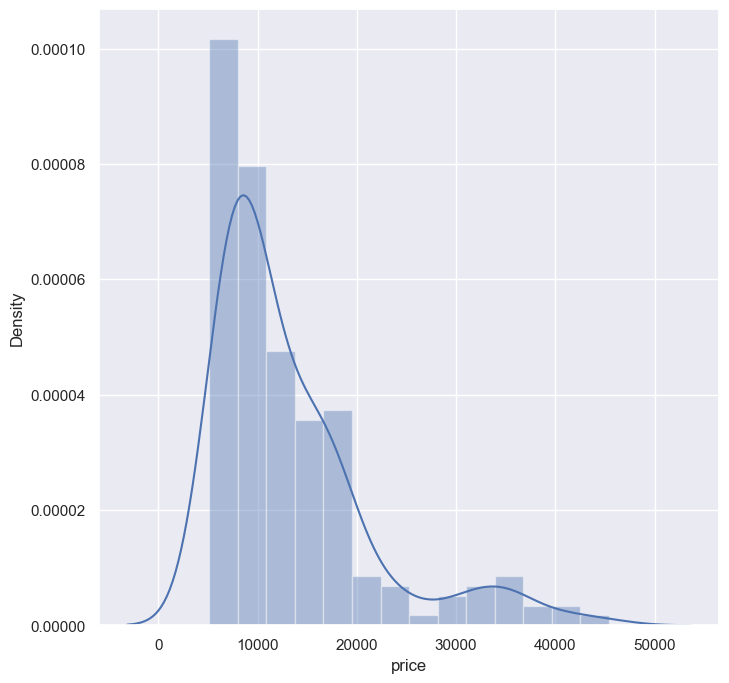

In [47]:
sns.distplot(data['price'],kde=True)

* Price distribution plot is right skewed 
* maximum  number of cars are in range of 20000

# Price Distribution Of Diesel V/S Gas Car

C:\Users\ajit7\AppData\Local\Temp\ipykernel_18044\2252145475.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[(data.fueltype== 'gas')]["price"],color='b',ax=ax)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.o

Text(0.5, 1.0, 'Distribution of ages of diesel vehicles')

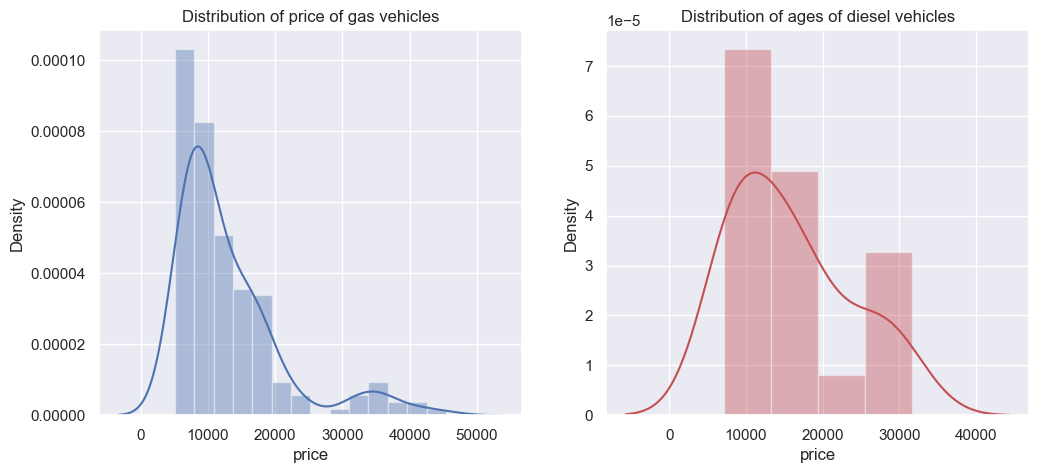

In [48]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.fueltype== 'gas')]["price"],color='b',ax=ax)
ax.set_title('Distribution of price of gas vehicles')

ax=f.add_subplot(122)
sns.distplot(data[(data.fueltype == 'diesel')]['price'],color='r',ax=ax)
ax.set_title('Distribution of ages of diesel vehicles')

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='fueltype', ylabel='price'>

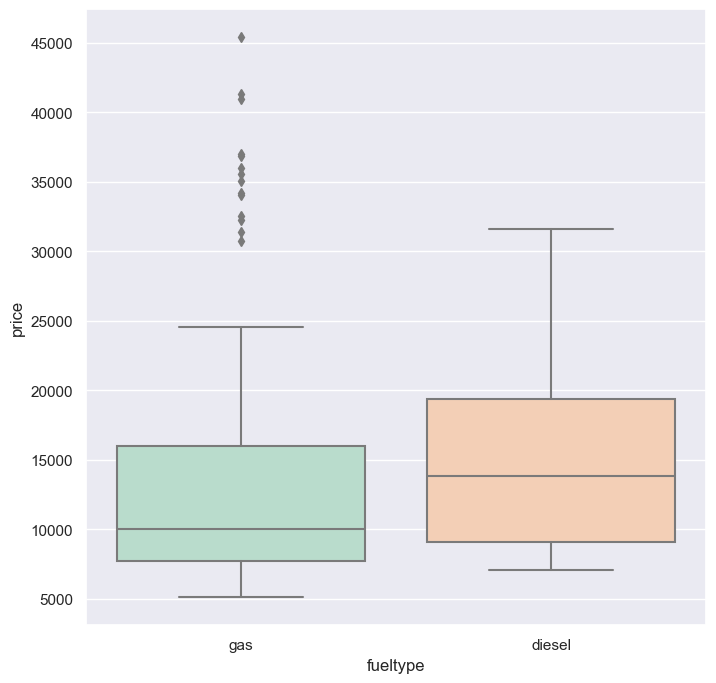

In [49]:
sns.boxplot(x = 'fueltype', y = 'price', data = data,palette='Pastel2')

* Price of diesel is much higher than of gas , also there are some outliers in gas vehicles

# Aspiration Ratio

In [50]:
df=pd.DataFrame(data['aspiration'].value_counts())

<Axes: ylabel='count'>

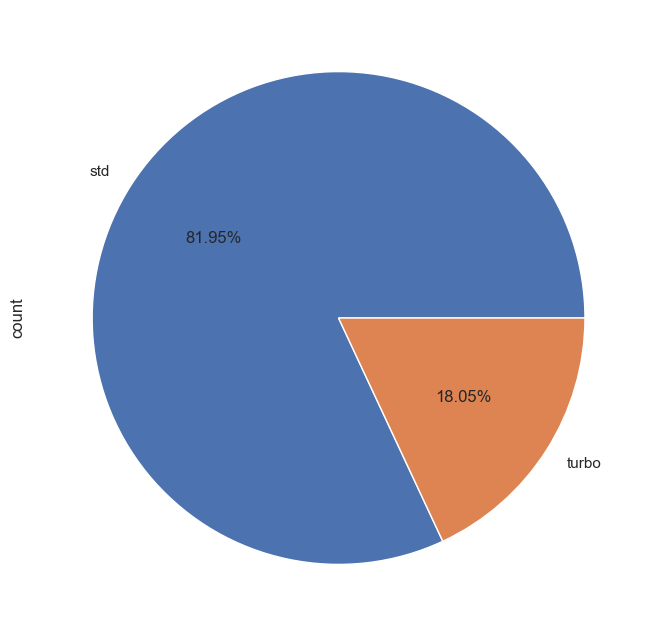

In [51]:
data['aspiration'].value_counts().plot(kind='pie',autopct='%1.2f%%')

* Most of the cars have standard aspiration

# Price distribution of Std vs Turbo aspiration vehicles

C:\Users\ajit7\AppData\Local\Temp\ipykernel_18044\3157106263.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot=sns.distplot(data[(data.aspiration== 'turbo')]["price"],color='#ca91eb',ax=ax)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating inste

Text(0.5, 1.0, 'Price distribution of Std aspiration vehicles')

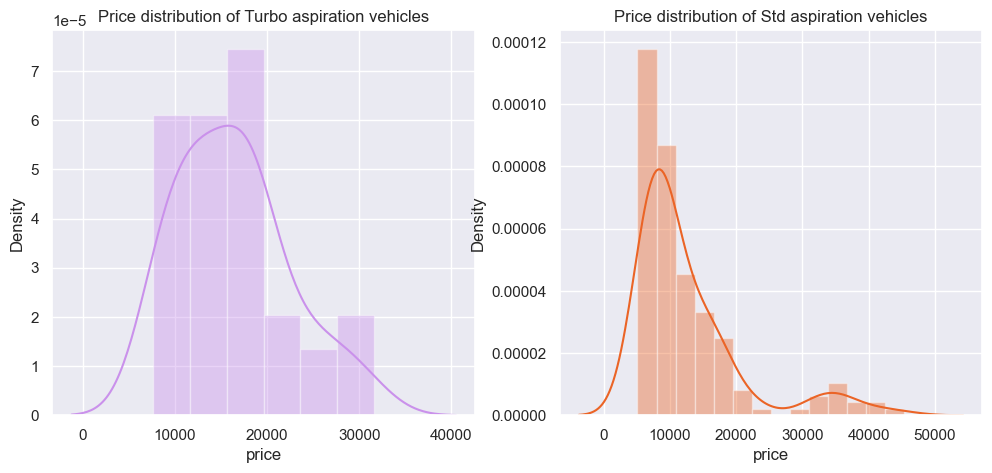

In [52]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
plot=sns.distplot(data[(data.aspiration== 'turbo')]["price"],color='#ca91eb',ax=ax)
ax.set_title('Price distribution of Turbo aspiration vehicles')

ax=f.add_subplot(122)
plot=sns.distplot(data[(data.aspiration == 'std')]['price'],color='#eb6426',ax=ax)
ax.set_title('Price distribution of Std aspiration vehicles')


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='aspiration', ylabel='price'>

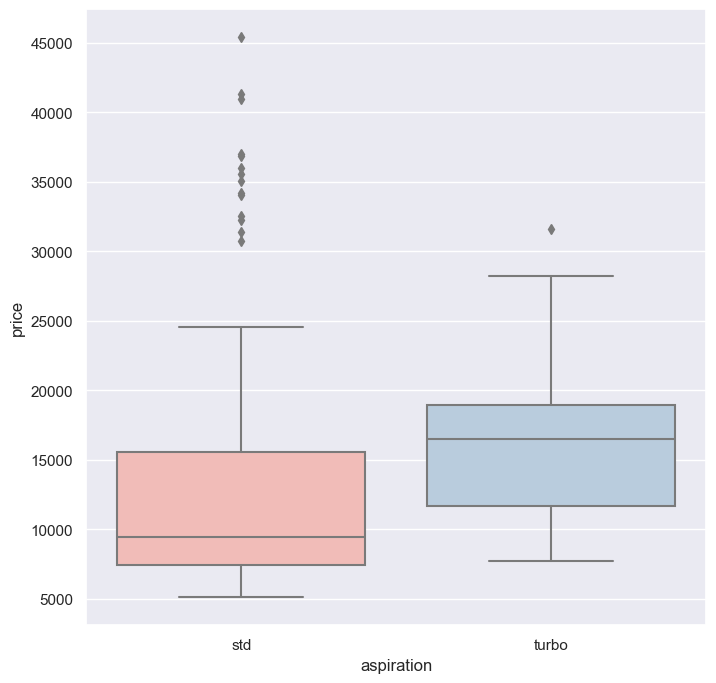

In [53]:
sns.boxplot(x = 'aspiration', y = 'price', data = data, palette='Pastel1')

* Price of turbo is higher in compared to std , although there are some outliers in std price

# Symboling 

Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

<BarContainer object of 205 artists>

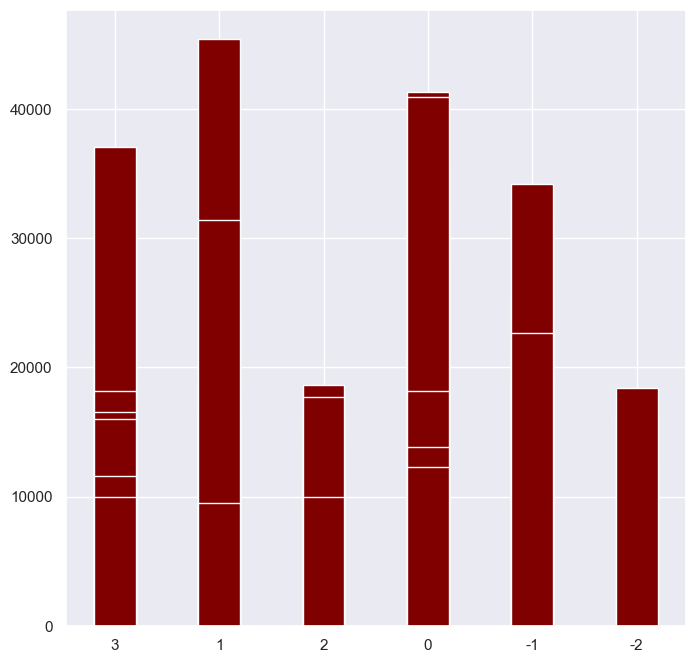

In [54]:
plt.bar(data['symboling'],height=data['price'], color ='maroon', width = 0.4)

 * Most of the car symboling has 0 value 

# Price Distribution According To Symboling 

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='symboling', ylabel='price'>

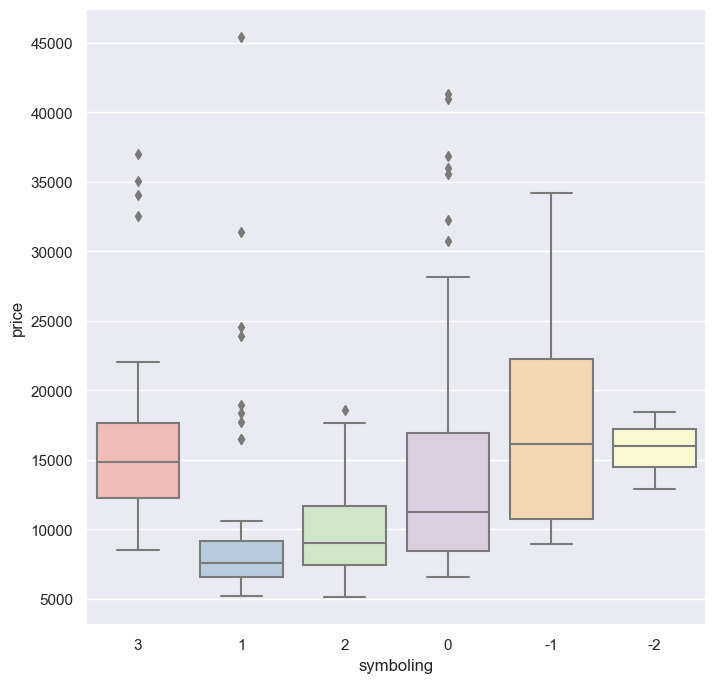

In [55]:
sns.boxplot(x = 'symboling', y = 'price', data = data,palette='Pastel1')

* Price of -1 symboling is higher in compare to others

# Door number

In [56]:
df=pd.DataFrame(data['doornumber'].value_counts())

<Axes: ylabel='count'>

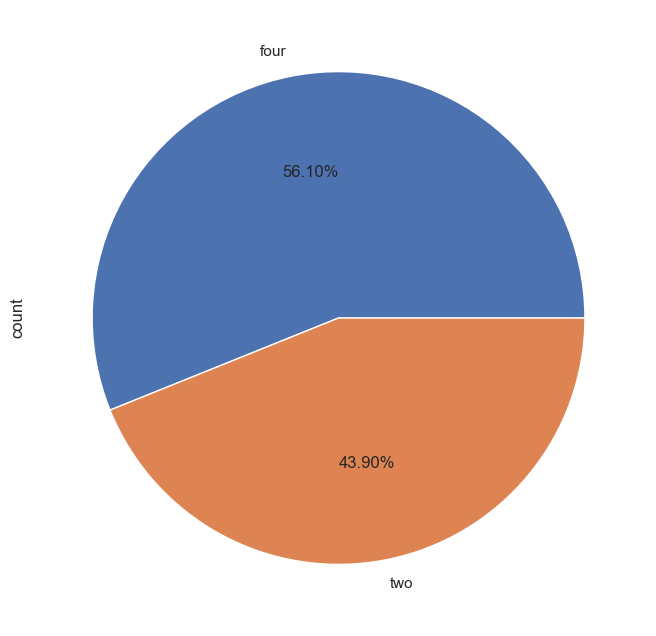

In [57]:
data['doornumber'].value_counts().plot(kind='pie',autopct='%1.2f%%')

* 115 cars has four dooors and 90 cars has 2 doors

# Price Distribution According To Door Number 

C:\Users\ajit7\AppData\Local\Temp\ipykernel_18044\100887524.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot=sns.distplot(data[(data.doornumber== 'two')]["price"],color='#ca91eb',ax=ax)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

Text(0.5, 1.0, 'Price distribution of cars having four doors')

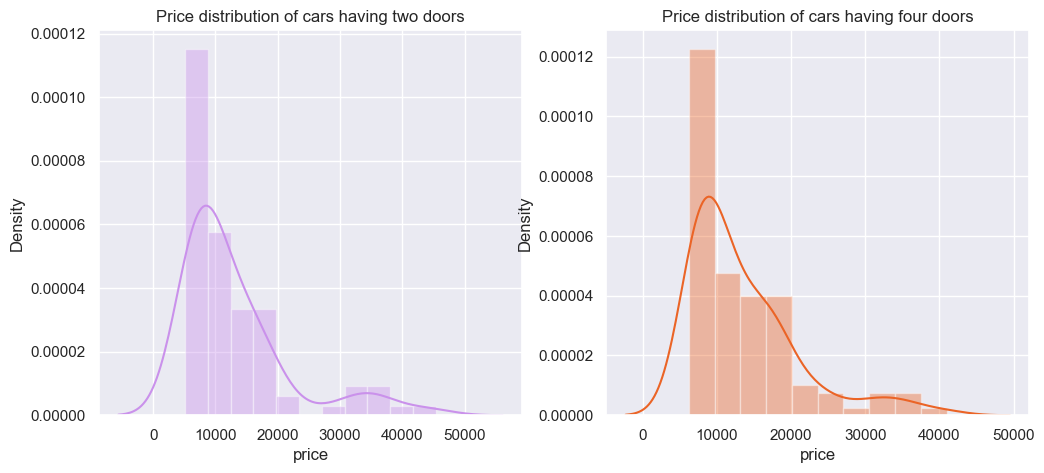

In [58]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
plot=sns.distplot(data[(data.doornumber== 'two')]["price"],color='#ca91eb',ax=ax)
ax.set_title('Price distribution of cars having two doors')

ax=f.add_subplot(122)
plot=sns.distplot(data[(data.doornumber == 'four')]['price'],color='#eb6426',ax=ax)
ax.set_title('Price distribution of cars having four doors')


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='doornumber', ylabel='price'>

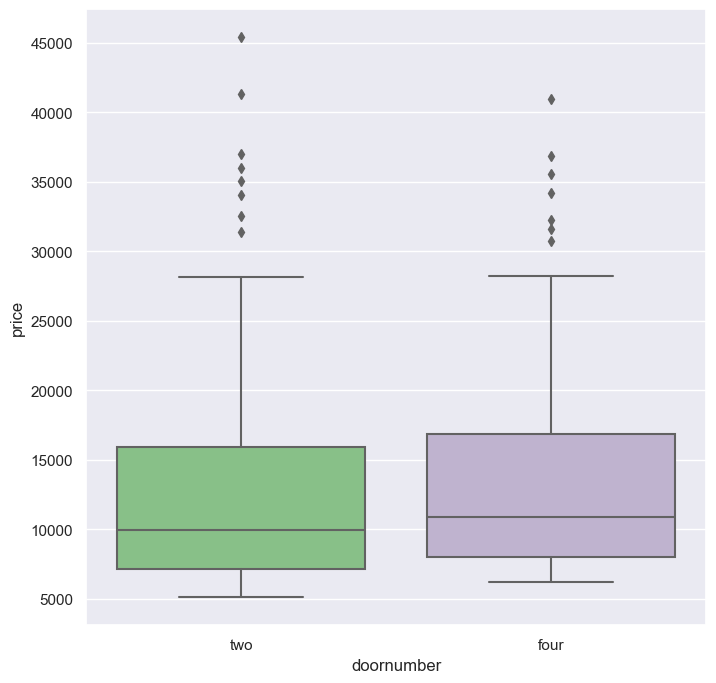

In [59]:
sns.boxplot(x = 'doornumber', y = 'price', data = data,palette='Accent')

* As you can see there is slight difference in distributions of cars having two doors vs cars having 4 doors

# Carbody

In [60]:
df=pd.DataFrame(data['carbody'].value_counts())

<Axes: ylabel='count'>

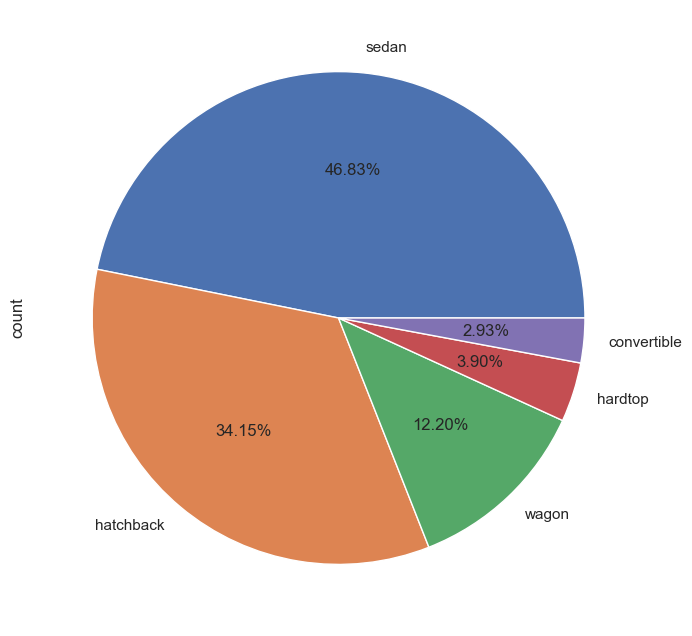

In [61]:
data['carbody'].value_counts().plot(kind='pie',autopct='%1.2f%%')

* majority of car body are sedan and hatchback

# Price distribution according to car body

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='carbody', ylabel='price'>

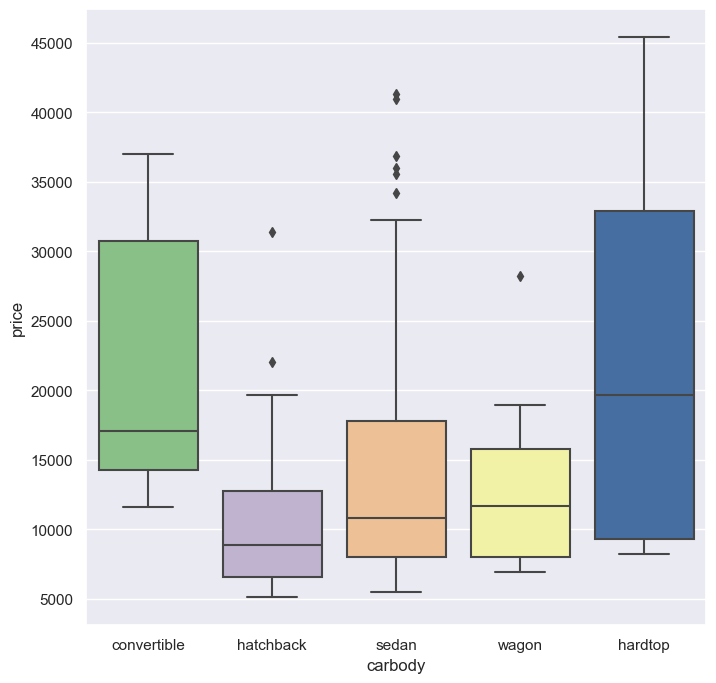

In [62]:
sns.boxplot(x = 'carbody', y = 'price', data = data,palette='Accent')

* price of hardtop is very high compare to others

# Drive Wheel

In [63]:
df=pd.DataFrame(data['drivewheel'].value_counts())

Text(0, 0.5, '')

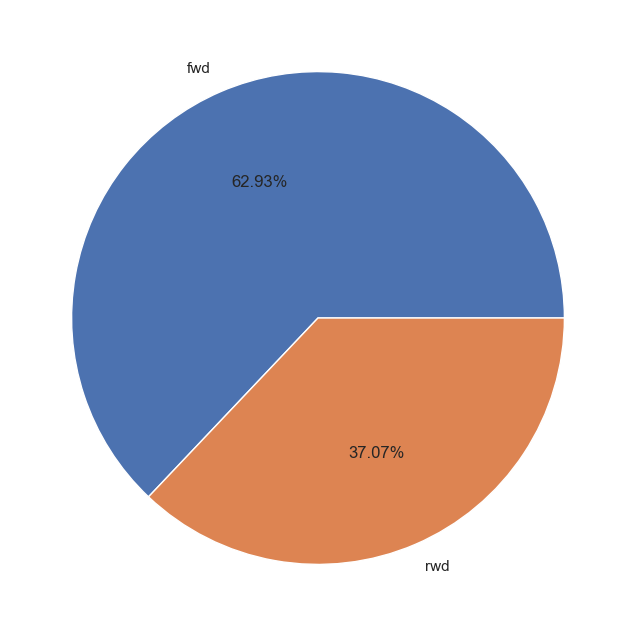

In [64]:
data['drivewheel'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.ylabel('')

* Maximum cars has fwd drive wheel

# Price distribution according to drive wheel 

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='drivewheel', ylabel='price'>

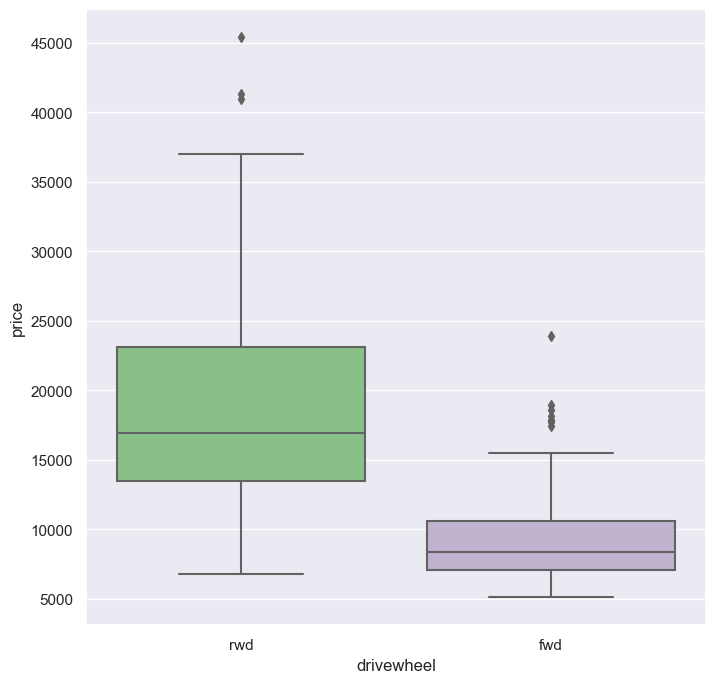

In [65]:
sns.boxplot(x = 'drivewheel', y = 'price', data = data,palette='Accent')

* Price range of rwd drivewheel cars is quite high compare to others

# Engine Location

Text(0, 0.5, '')

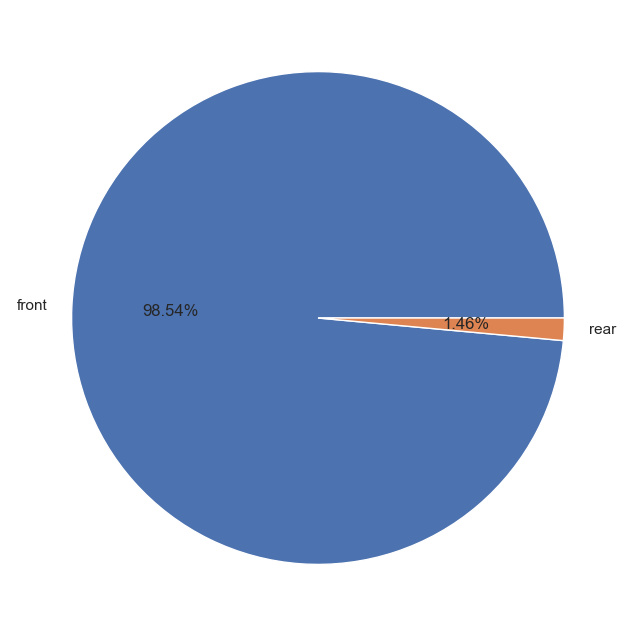

In [66]:
data['enginelocation'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.ylabel('')

* less number of cars having rear engine 

# Engine type

Text(0, 0.5, '')

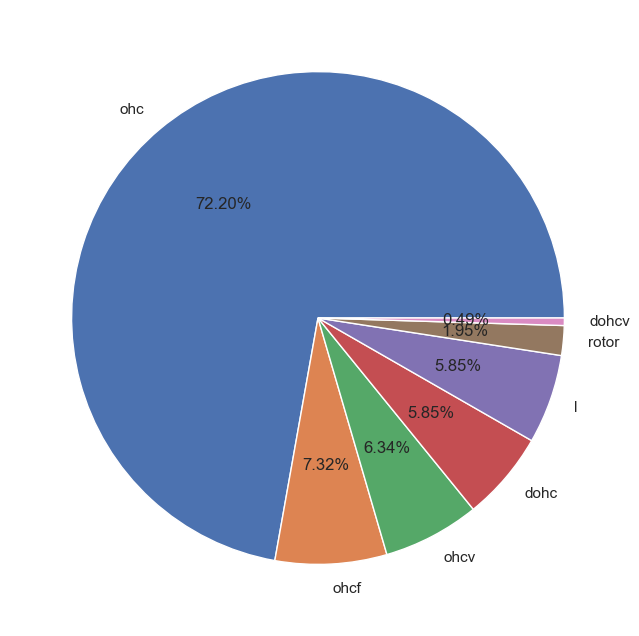

In [67]:
data['enginetype'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.ylabel('')

* Maximum number of engine type are of 'ohc'

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='enginetype', ylabel='price'>

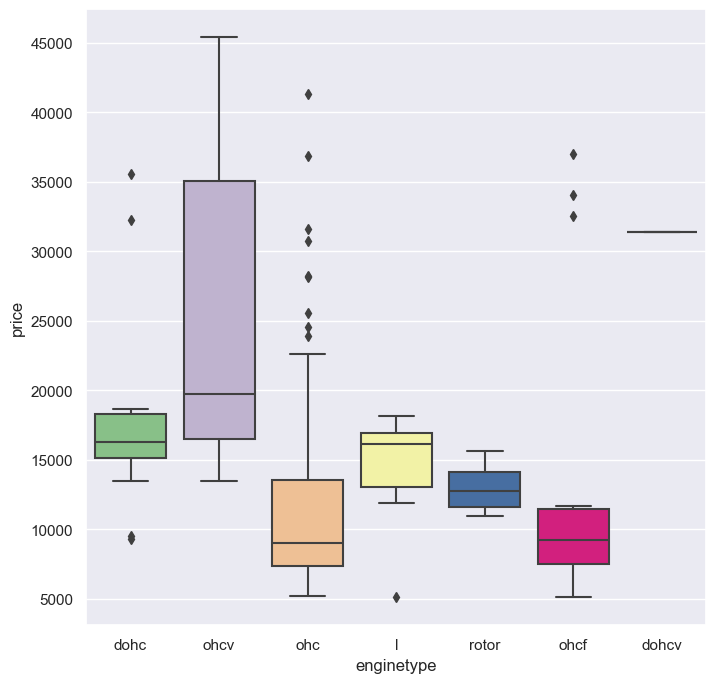

In [68]:
sns.boxplot(x = 'enginetype', y = 'price', data = data,palette='Accent')

* price range of ohcv engine cars are quite high in compare to others

# Cylinder Number

Text(0, 0.5, '')

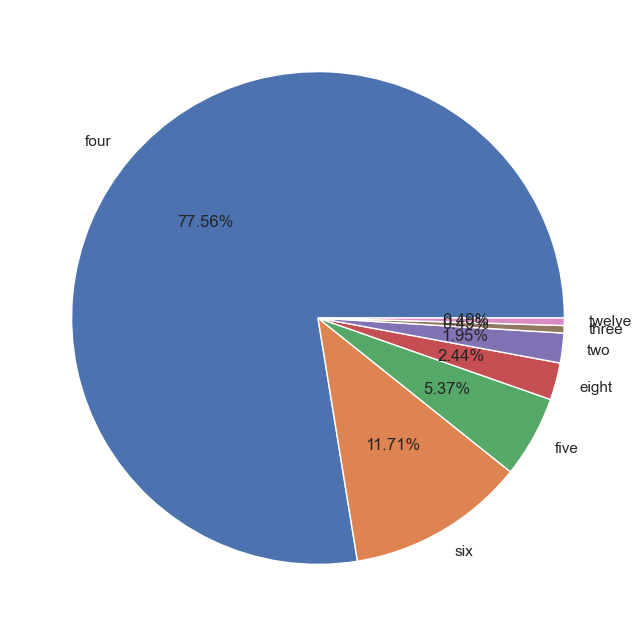

In [69]:
data['cylindernumber'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.ylabel('')

* maximum cars are of four cylinder number

# Price Distribution According To Cylinder Number

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='cylindernumber', ylabel='price'>

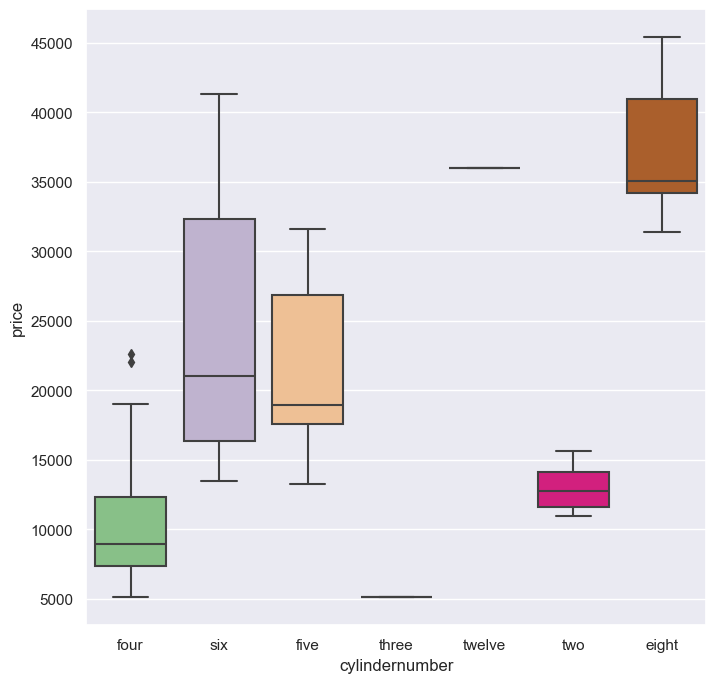

In [70]:
sns.boxplot(x = 'cylindernumber', y = 'price', data = data,palette='Accent')

* there is only 1 car having cylinder number 3 and 12 .
* car having cylinder number eight has higher price range.

# Fuel system 

In [71]:
df=pd.DataFrame(data['fuelsystem'].value_counts())

<Axes: ylabel='count'>

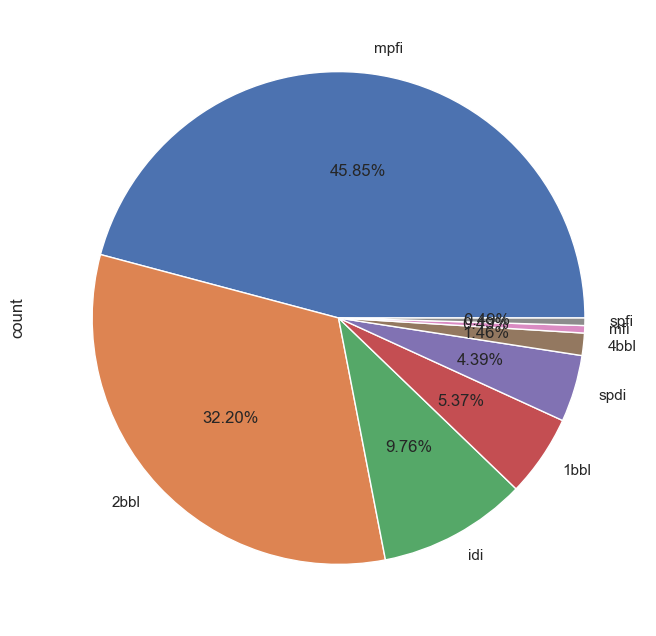

In [72]:
data['fuelsystem'].value_counts().plot(kind='pie',autopct='%1.2f%%')

* most number of cars having fuel system mpfi
* least number of cars having fuel system mfi and spfi

# Price Distribution According To Fuel System

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='fuelsystem', ylabel='price'>

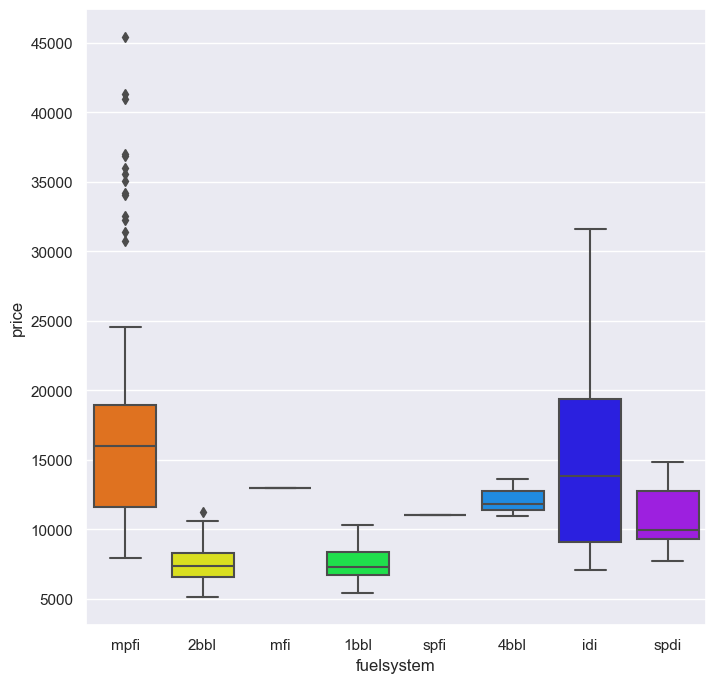

In [73]:
sns.boxplot(x = 'fuelsystem', y = 'price', data = data,palette='gist_rainbow')

* price range are high of car having idi fuel system 

# Visualising Numerical Features

### Wheel Base Vs Price


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='wheelbase', ylabel='price'>

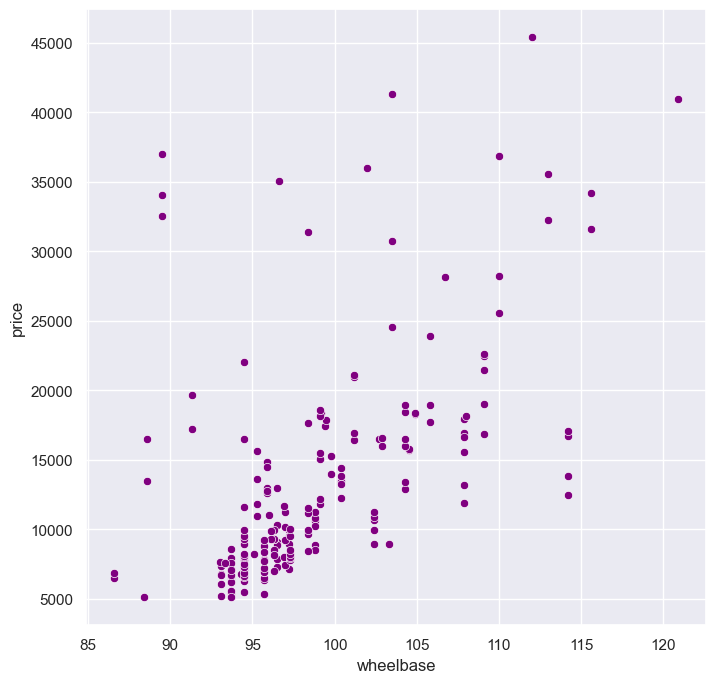

In [74]:
sns.scatterplot(x="wheelbase", y="price", data=data,color='purple')

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

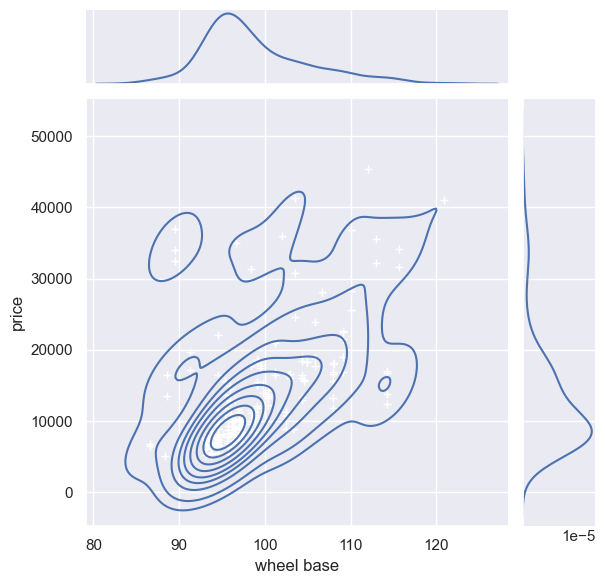

In [75]:
g = sns.jointplot(x="wheelbase", y="price", data=data, kind="kde", color="b")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("wheel base", "price");

* Highly scattered points

### Carlength V/S Car price

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='carlength', ylabel='price'>

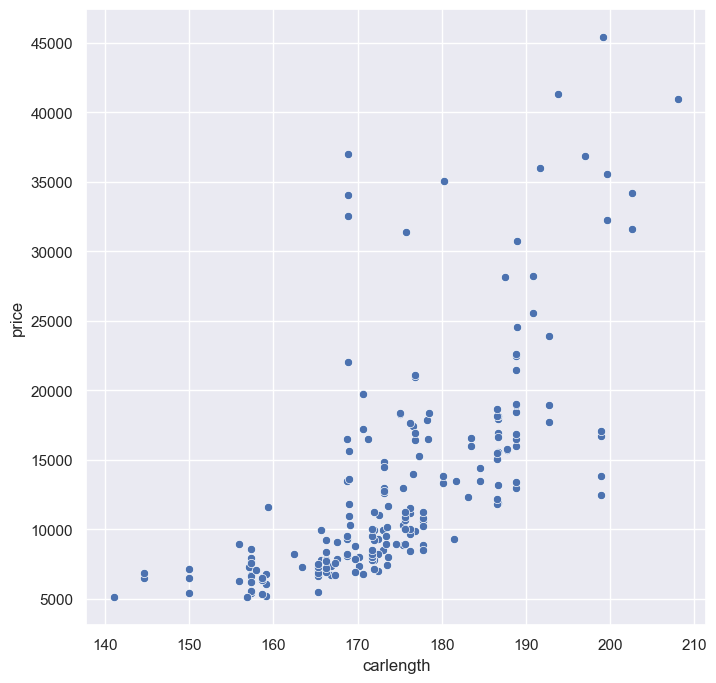

In [76]:
sns.scatterplot(x="carlength", y="price", data=data,color='b')

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

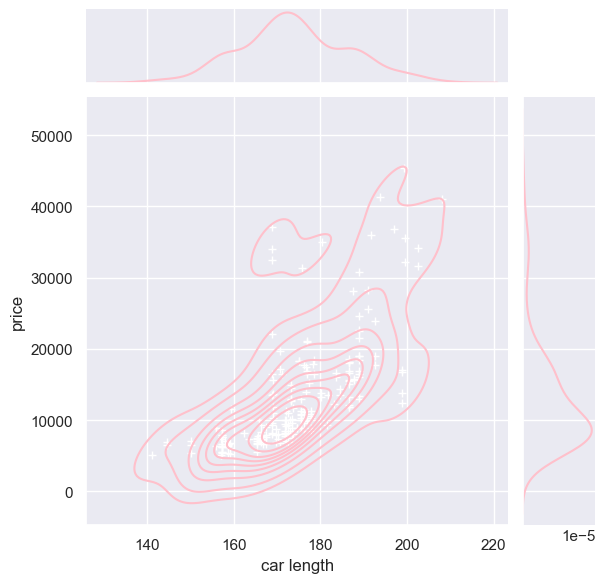

In [77]:
g = sns.jointplot(x="carlength", y="price", data=data, kind="kde", color="pink")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("car length", "price");

* car length also scattered but less scattered than wheelbase

### Car Width V/S Price

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='carwidth', ylabel='price'>

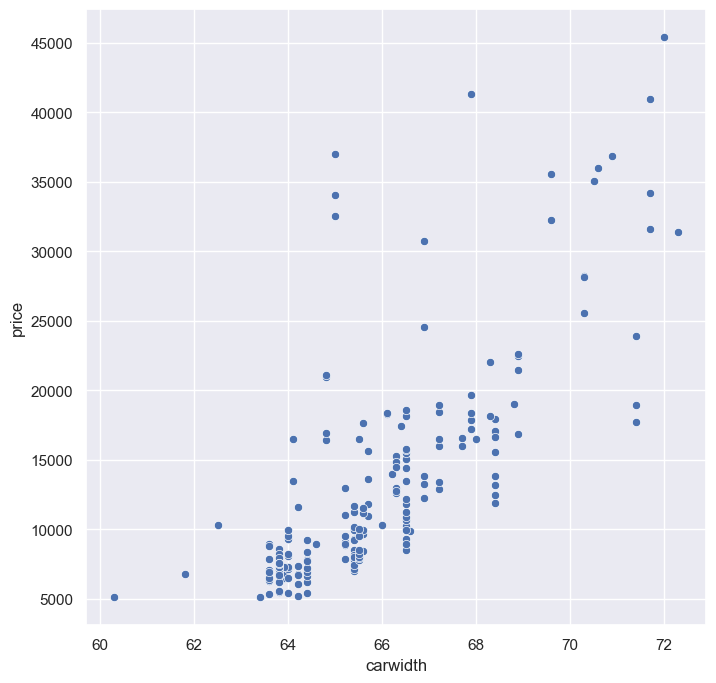

In [78]:
sns.scatterplot(x="carwidth", y="price", data=data,color='b')

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

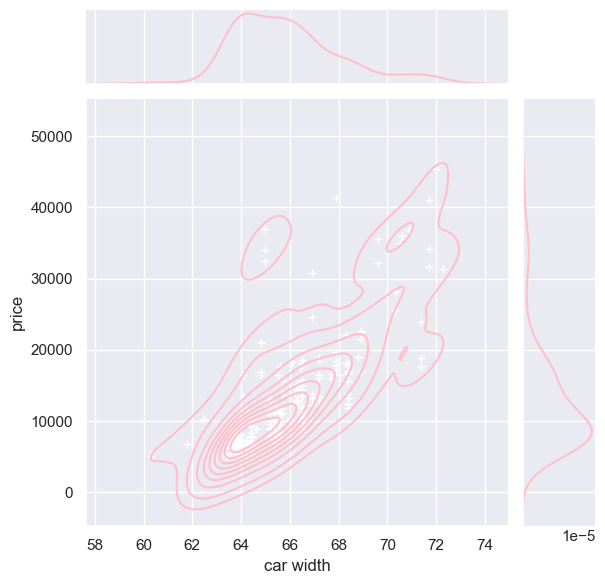

In [79]:
g = sns.jointplot(x="carwidth", y="price", data=data, kind="kde", color="pink")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("car width", "price");

### Car Length V/S Car Width

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='carlength', ylabel='carwidth'>

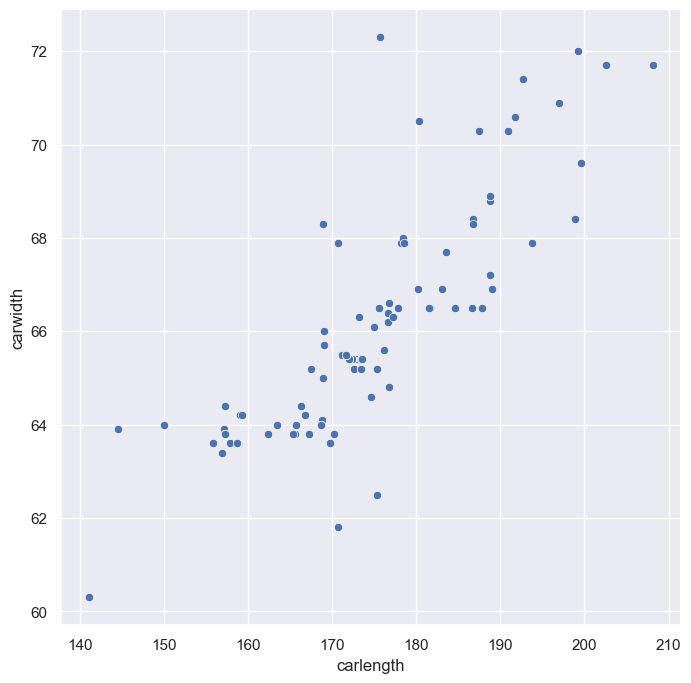

In [80]:
sns.scatterplot(x="carlength", y="carwidth", data=data,color='b')

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

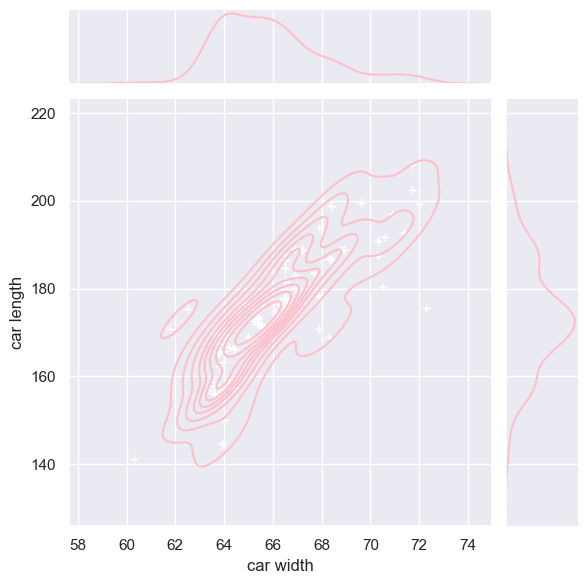

In [81]:
g = sns.jointplot(x="carwidth", y="carlength", data=data, kind="kde", color="pink")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("car width", "car length");

* Strong relation is seemed between car length and car width 

### Curbweight V/S Price

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='curbweight', ylabel='price'>

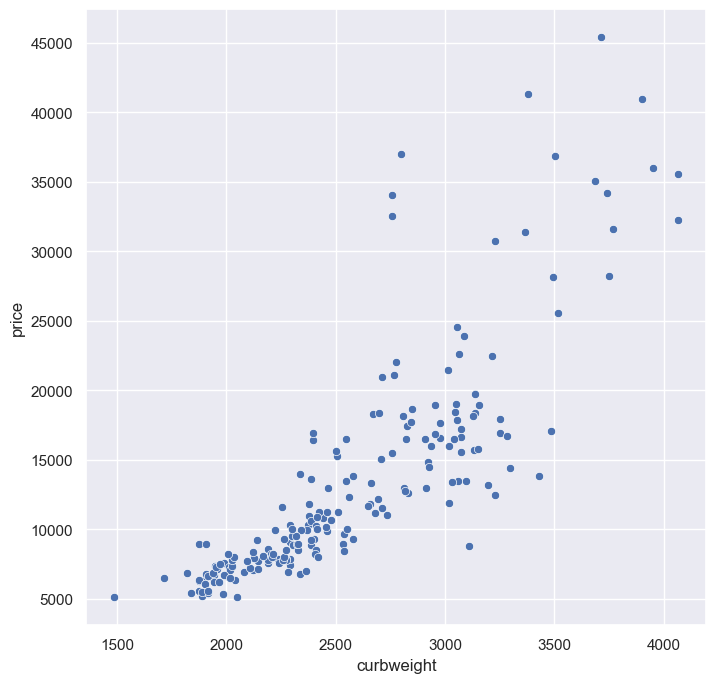

In [82]:
sns.scatterplot(x="curbweight", y="price", data=data,color='b')

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

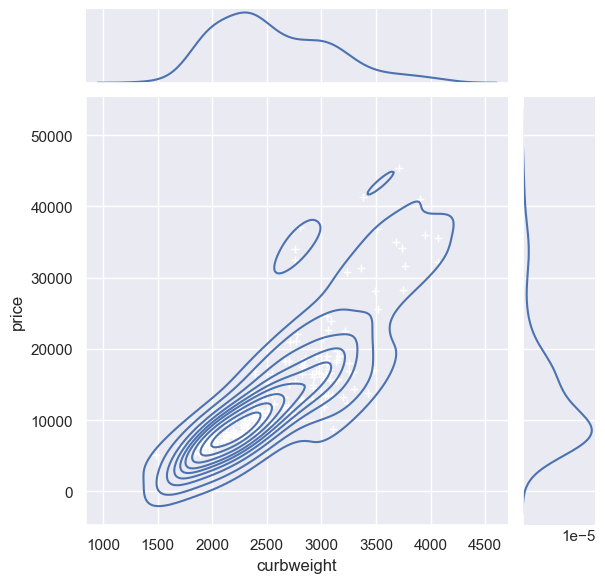

In [83]:
g = sns.jointplot(x="curbweight", y="price", data=data, kind="kde", color="b")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("curbweight", "price");

* points are scattered after curbweight of 2900, initially it is increasing as curbweight increases as you can alse see in the joint plot color becomes lighter after curbweight of 2900 .

### Engine Size V/S Price

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='enginesize', ylabel='price'>

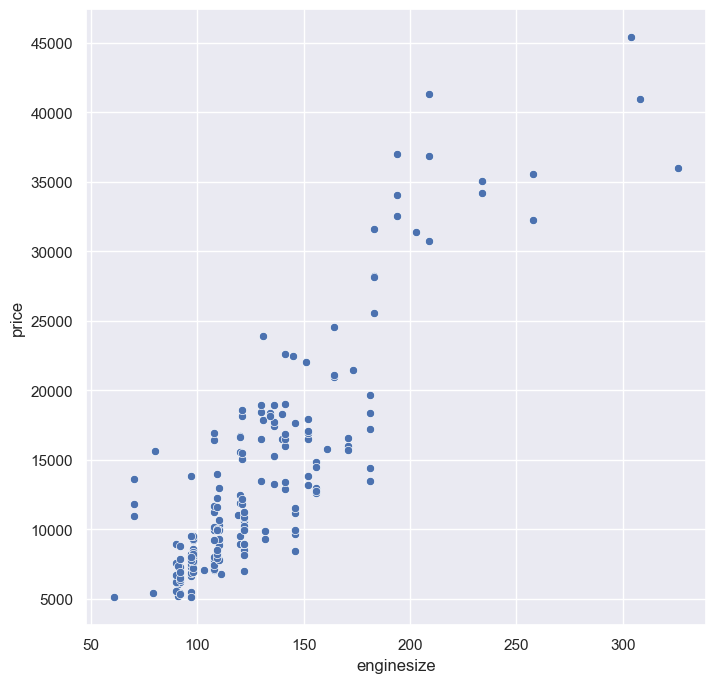

In [84]:
sns.scatterplot(x="enginesize", y="price", data=data,color='b')

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

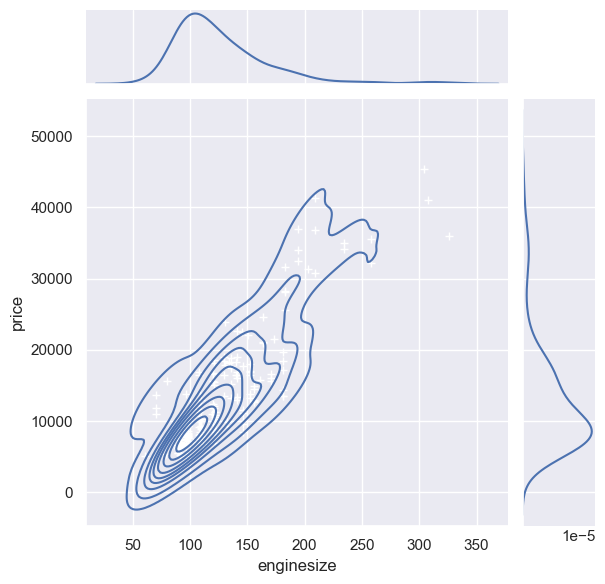

In [85]:
g = sns.jointplot(x="enginesize", y="price", data=data, kind="kde", color="b")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("enginesize", "price");

* points are scattered after engine size of 140, initially it is increasing as curbweight increases as you can alse see in the joint plot color becomes lighter after engine size of 140 .

### Boreratio V/S Price

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='boreratio', ylabel='price'>

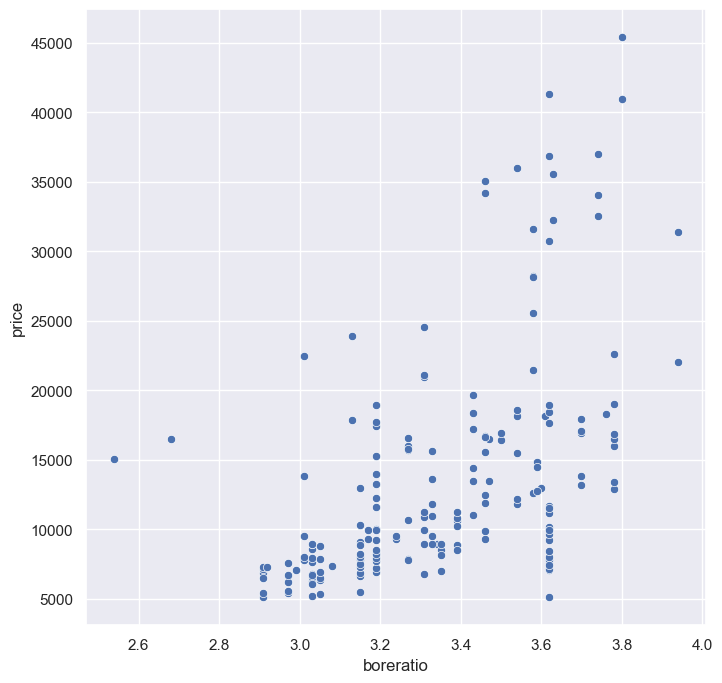

In [86]:
sns.scatterplot(x="boreratio", y="price", data=data,color='b')

### Stroke V/S Price

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='stroke', ylabel='price'>

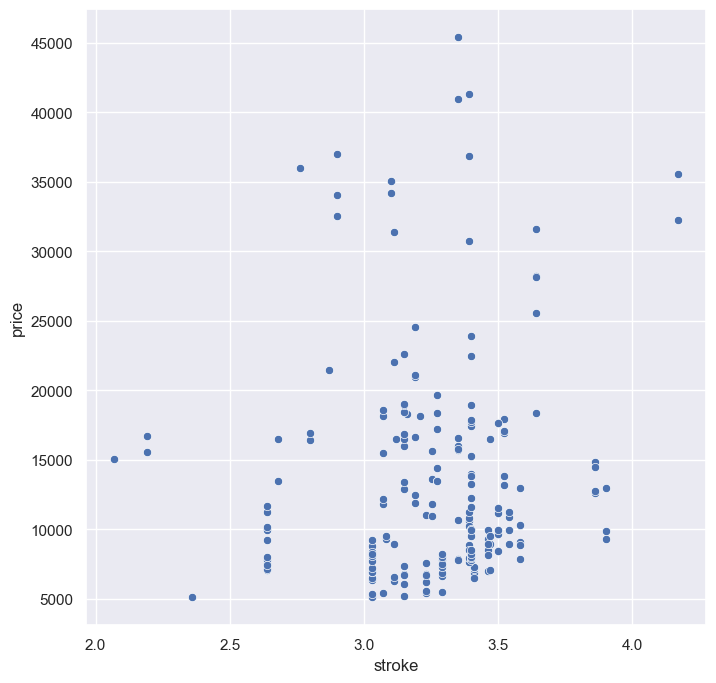

In [87]:
sns.scatterplot(x="stroke", y="price", data=data,color='b')

* very weak correlation between stroke vs price

### Compression Ratio V/S Price

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='compressionratio', ylabel='price'>

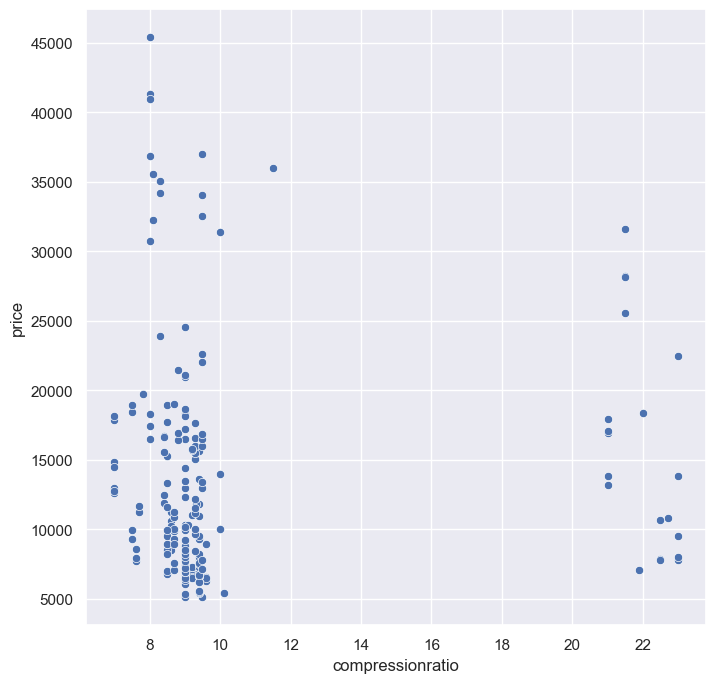

In [88]:
sns.scatterplot(x="compressionratio", y="price", data=data,color='b')

* no relation between compression ratio and price

### Horsepower V/S Price

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='horsepower', ylabel='price'>

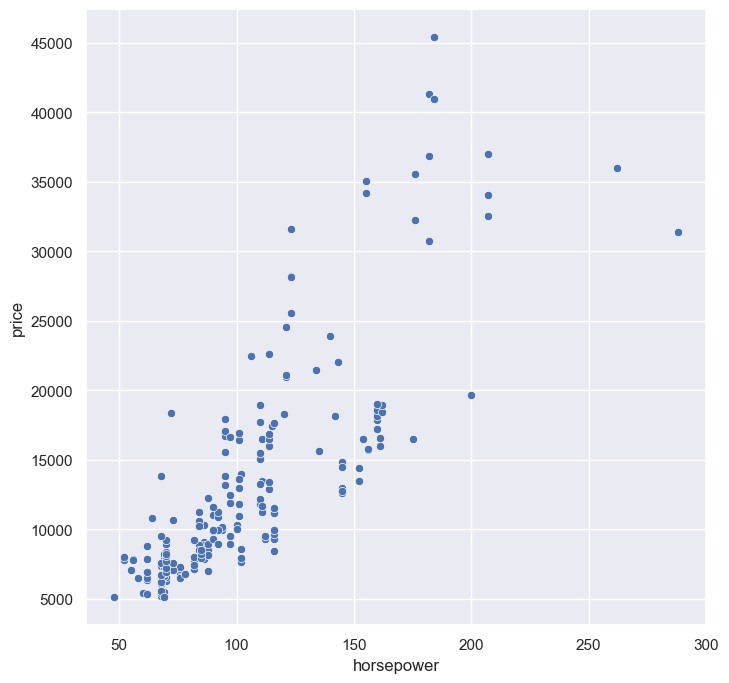

In [89]:
sns.scatterplot(x="horsepower", y="price", data=data,color='b')

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

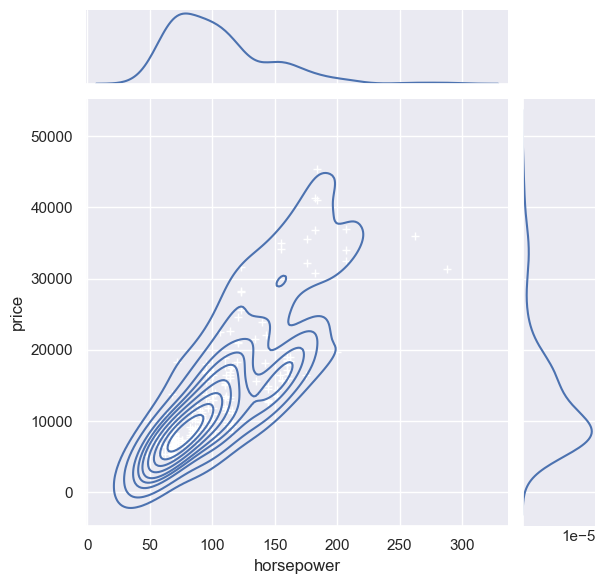

In [90]:
g = sns.jointplot(x="horsepower", y="price", data=data, kind="kde", color="b")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("horsepower", "price");

### Peakrpm V/S Price

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='peakrpm', ylabel='price'>

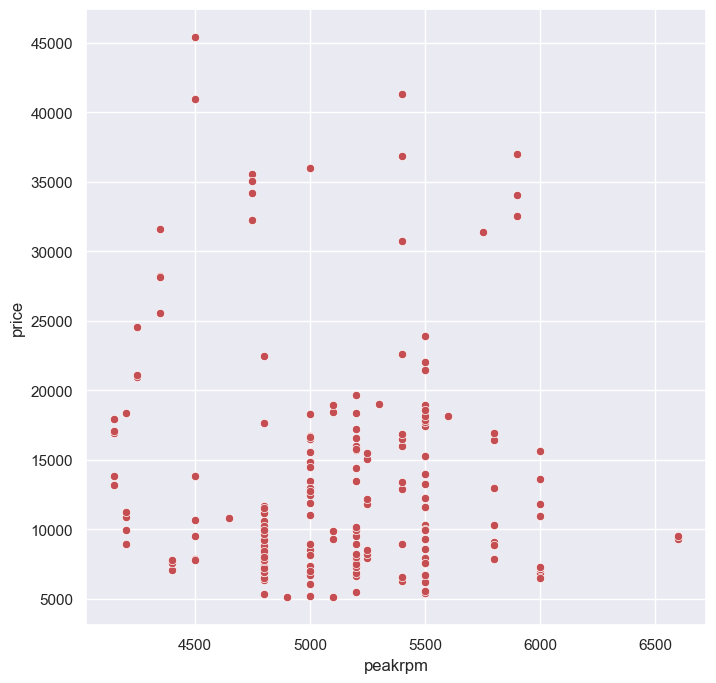

In [91]:
sns.scatterplot(x="peakrpm", y="price", data=data,color='r')

* no correlation between peakrpm and  price

### Citympg V/S Price

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='citympg', ylabel='price'>

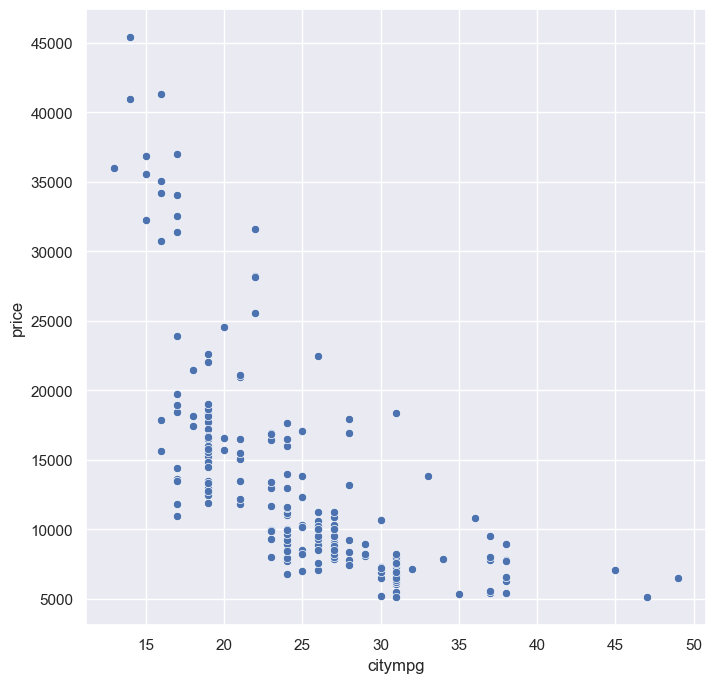

In [92]:
sns.scatterplot(x="citympg", y="price", data=data,color='b')

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

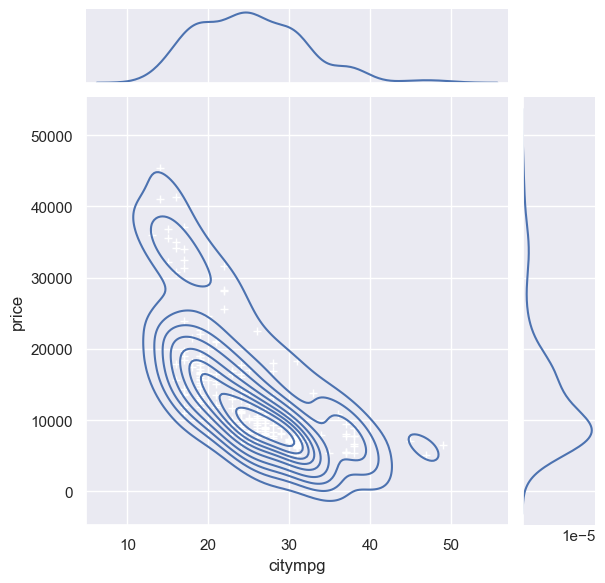

In [93]:
g = sns.jointplot(x="citympg", y="price", data=data, kind="kde", color="b")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("citympg", "price");

* negative correlation is seen between citympg and price

### Highwaympg V/S Price

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='highwaympg', ylabel='price'>

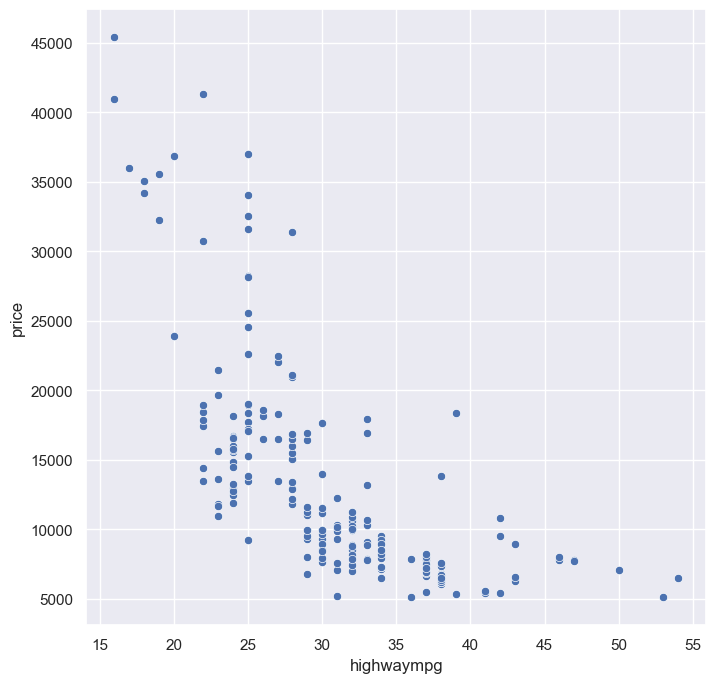

In [94]:
sns.scatterplot(x="highwaympg", y="price", data=data,color='b')

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

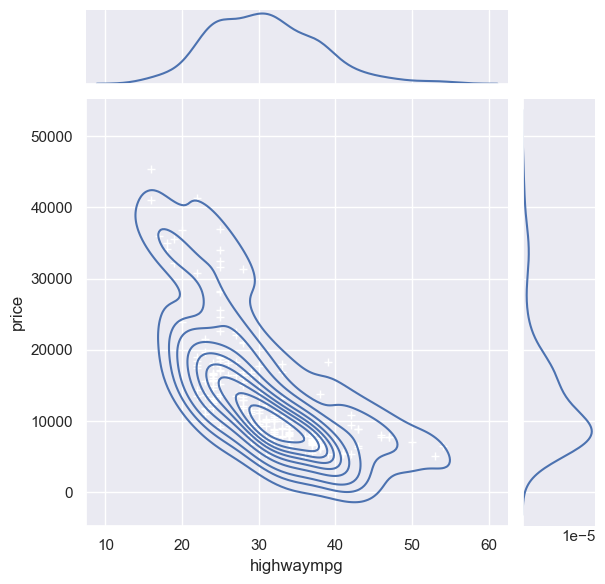

In [95]:
g = sns.jointplot(x="highwaympg", y="price", data=data, kind="kde", color="b")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("highwaympg", "price");

* Negative correlation between highwaympg and price

# Pairplot Of All Numerical Features

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

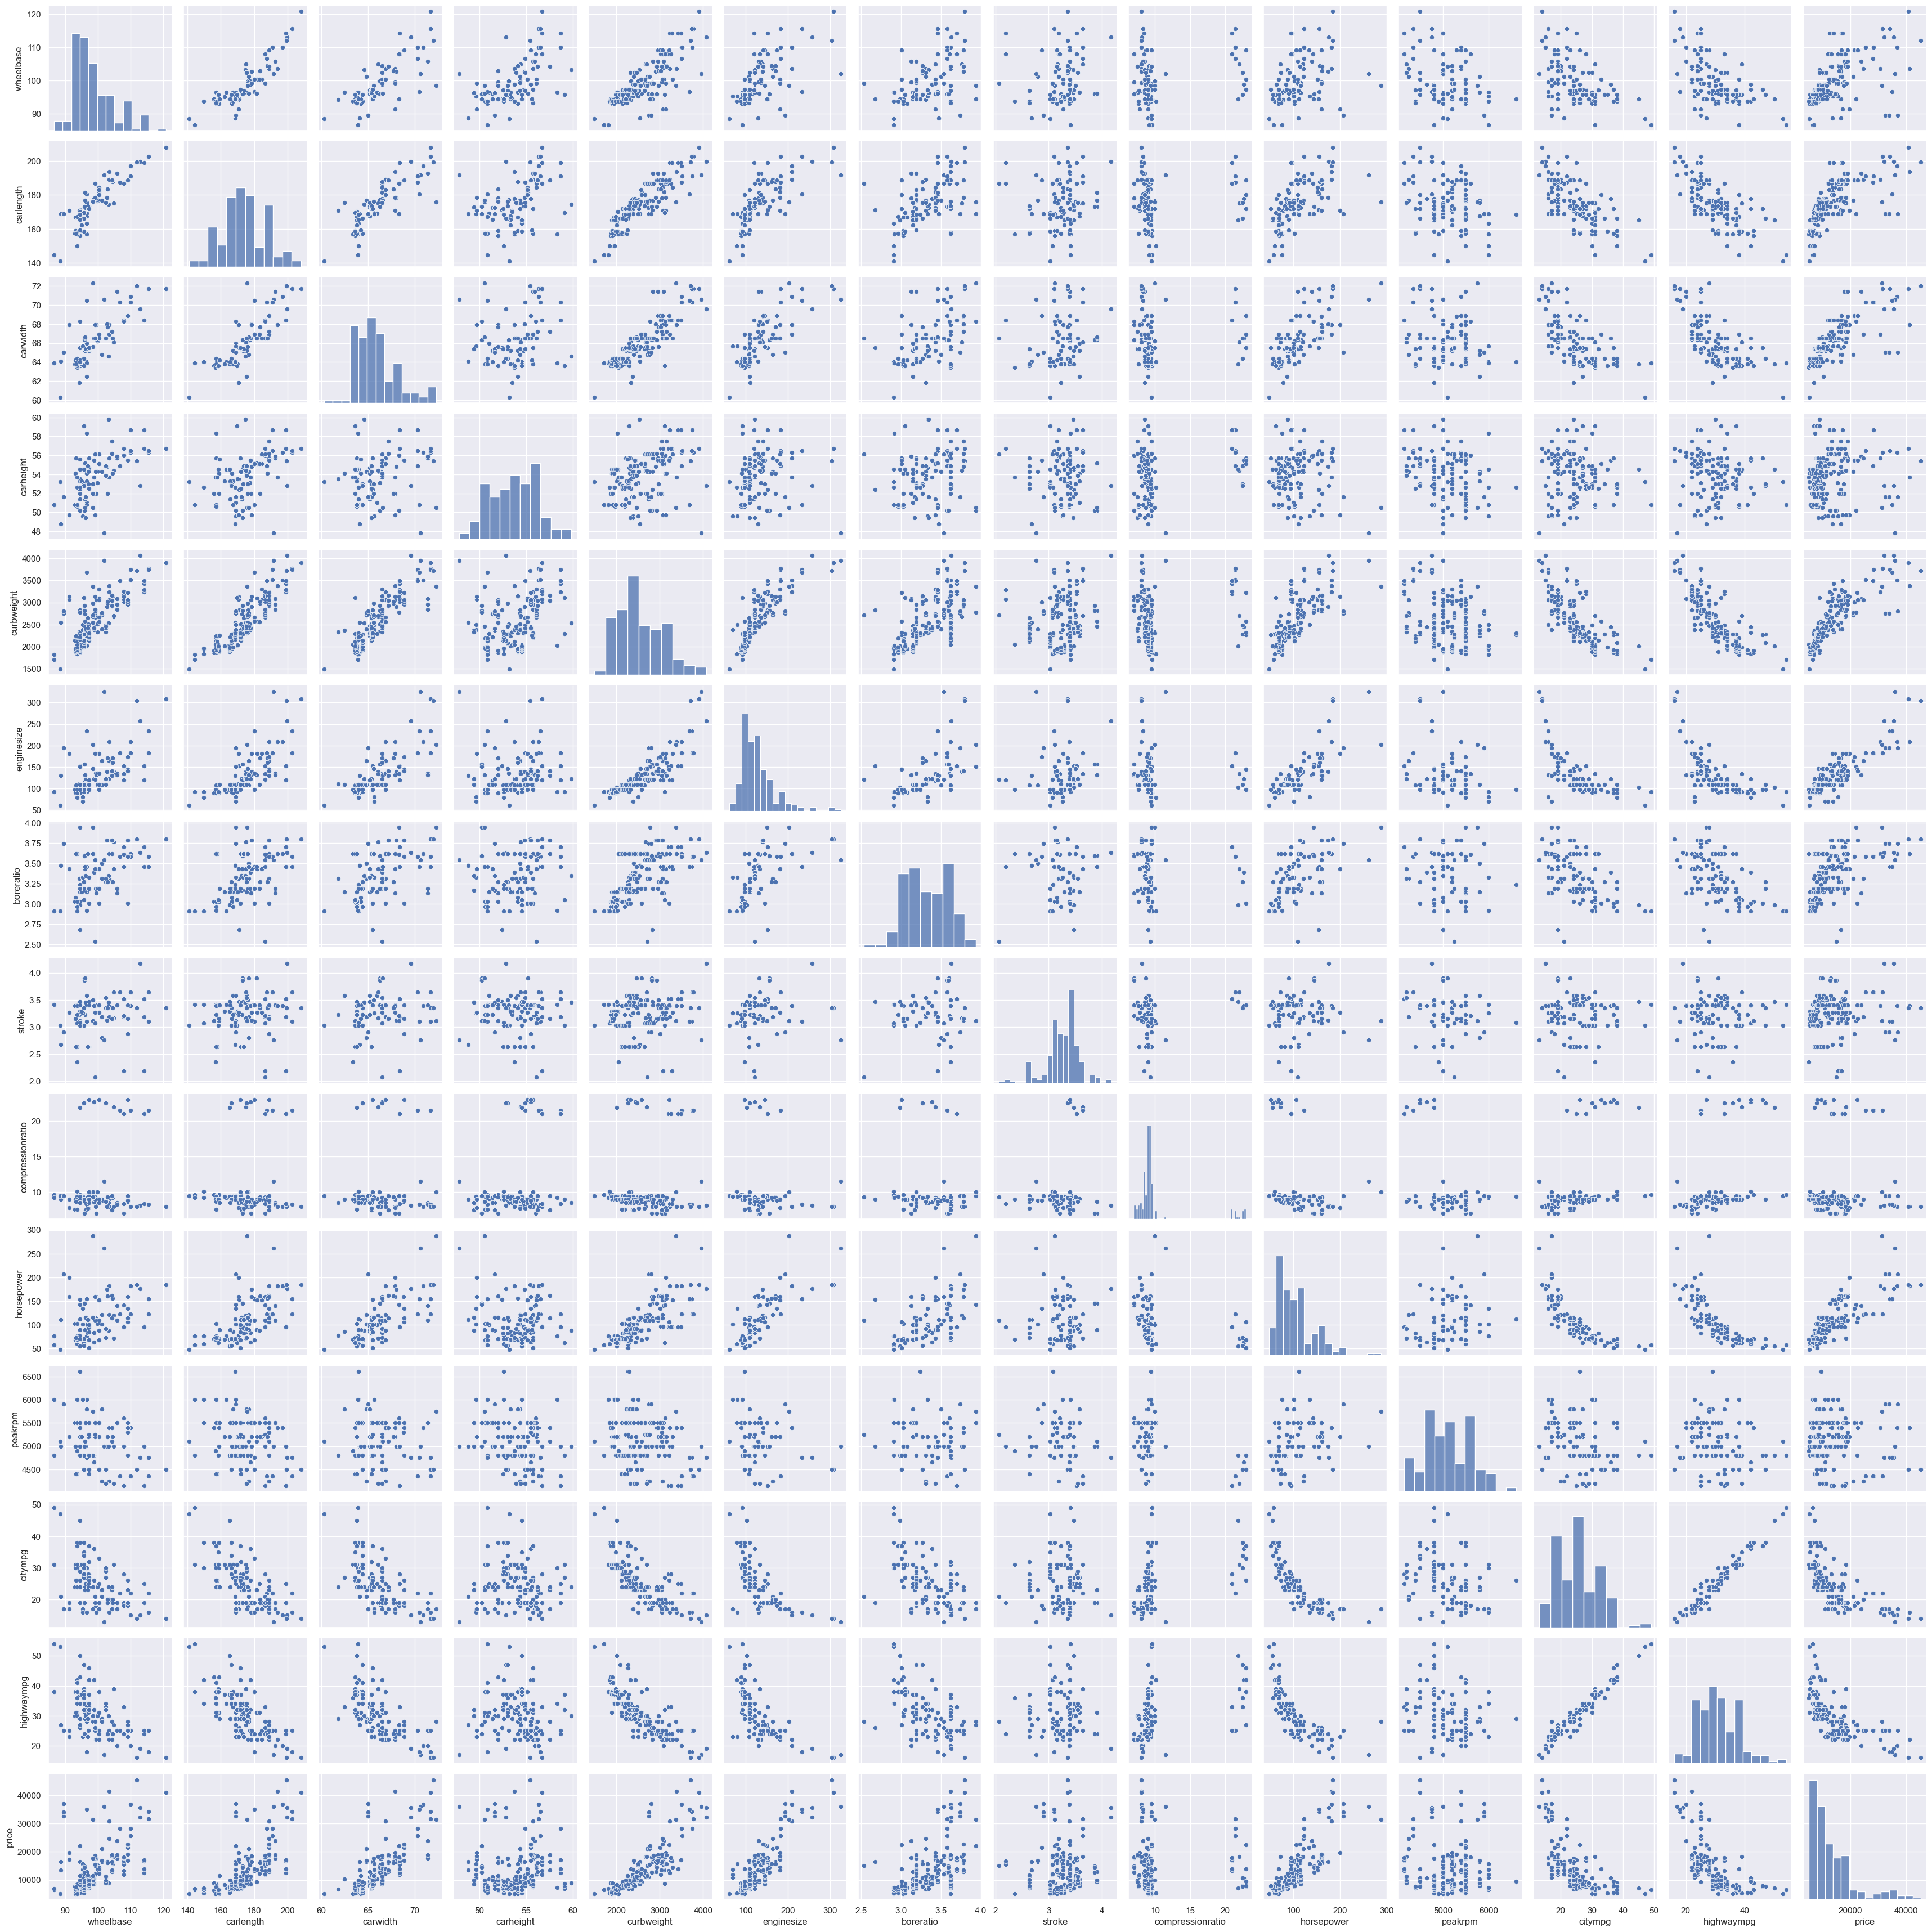

In [96]:
ax = sns.pairplot(data[numerical_cols])

# Correlation Matrix

In [97]:
data[numerical_cols].corr()

wheelbase  carlength  carwidth  carheight  curbweight  \
wheelbase          1.000000   0.874587  0.795144   0.589435    0.776386   
carlength          0.874587   1.000000  0.841118   0.491029    0.877728   
carwidth           0.795144   0.841118  1.000000   0.279210    0.867032   
carheight          0.589435   0.491029  0.279210   1.000000    0.295572   
curbweight         0.776386   0.877728  0.867032   0.295572    1.000000   
enginesize         0.569329   0.683360  0.735433   0.067149    0.850594   
boreratio          0.488750   0.606454  0.559150   0.171071    0.648480   
stroke             0.160959   0.129533  0.182942  -0.055307    0.168790   
compressionratio   0.249786   0.158414  0.181129   0.261214    0.151362   
horsepower         0.353294   0.552623  0.640732  -0.108802    0.750739   
peakrpm           -0.360469  -0.287242 -0.220012  -0.320411   -0.266243   
citympg           -0.470414  -0.670909 -0.642704  -0.048640   -0.757414   
highwaympg        -0.544082  -0.704662 -0.677218  -0.107358   -0.797465   
price              0.577816   0.682920  0.759325   0.119336    0.835305   

                  enginesize  boreratio    stroke  compressionratio  \
wheelbase           0.569329   0.488750  0.160959          0.249786   
carlength           0.683360   0.606454  0.129533          0.158414   
carwidth            0.735433   0.559150  0.182942          0.181129   
carheight           0.067149   0.171071 -0.055307          0.261214   
curbweight          0.850594   0.648480  0.168790          0.151362   
enginesize          1.000000   0.583774  0.203129          0.028971   
boreratio           0.583774   1.000000 -0.055909          0.005197   
stroke              0.203129  -0.055909  1.000000          0.186110   
compressionratio    0.028971   0.005197  0.186110          1.000000   
horsepower          0.809769   0.573677  0.080940         -0.204326   
peakrpm            -0.244660  -0.254976 -0.067964         -0.435741   
citympg            -0.653658  -0.584532 -0.042145          0.324701   
highwaympg         -0.677470  -0.587012 -0.043931          0.265201   
price               0.874145   0.553173  0.079443          0.067984   

                  horsepower   peakrpm   citympg  highwaympg     price  
wheelbase           0.353294 -0.360469 -0.470414   -0.544082  0.577816  
carlength           0.552623 -0.287242 -0.670909   -0.704662  0.682920  
carwidth            0.640732 -0.220012 -0.642704   -0.677218  0.759325  
carheight          -0.108802 -0.320411 -0.048640   -0.107358  0.119336  
curbweight          0.750739 -0.266243 -0.757414   -0.797465  0.835305  
enginesize          0.809769 -0.244660 -0.653658   -0.677470  0.874145  
boreratio           0.573677 -0.254976 -0.584532   -0.587012  0.553173  
stroke              0.080940 -0.067964 -0.042145   -0.043931  0.079443  
compressionratio   -0.204326 -0.435741  0.324701    0.265201  0.067984  
horsepower          1.000000  0.131073 -0.801456   -0.770544  0.808139  
peakrpm             0.131073  1.000000 -0.113544   -0.054275 -0.085267  
citympg            -0.801456 -0.113544  1.000000    0.971337 -0.685751  
highwaympg         -0.770544 -0.054275  0.971337    1.000000 -0.697599  
price               0.808139 -0.085267 -0.685751   -0.697599  1.000000

<Axes: >

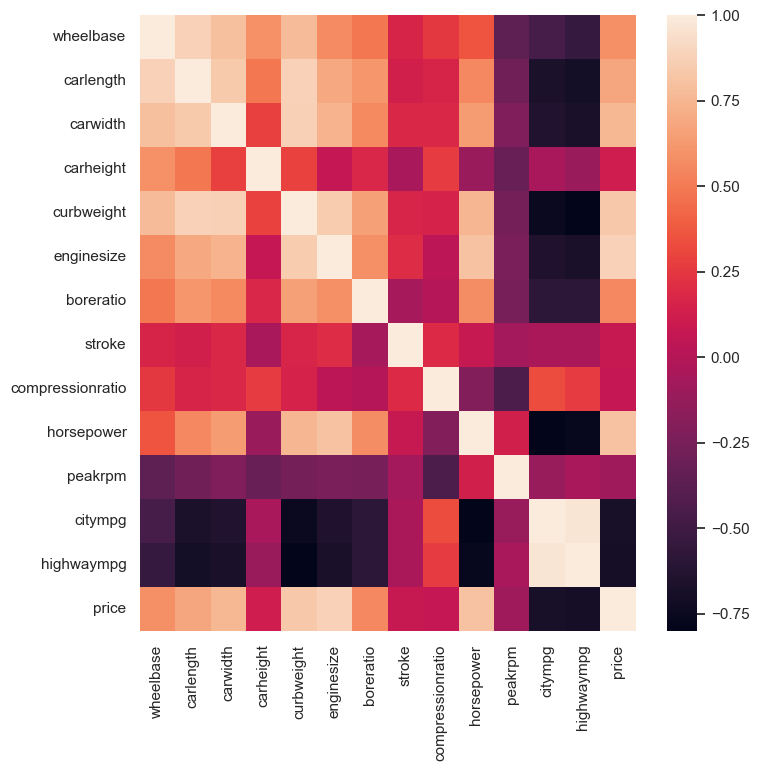

In [98]:
sns.heatmap(data[numerical_cols].corr())

* wheelbase has high positive correlation with carlength,carwidth and curbweight	
* carlength has high postive correlation with curbweight
* carlength has negative correlation with highwaympg 
* carwidth has high postive correlation with curbweight and engine size
* enginesize has high positive correlation with horsepower
* curbweight has high positive correlation with engine size and horse power, negative correlation with highwaympg
* horsepower has negative correlation with citympg and highwaympg
* citympg and highwaympg are highly correlated 


# Scatter Plot Of Wheelbase, Carlength, Carheight and Carweight  With Price

In [99]:
col=['wheelbase','carlength','carwidth','curbweight','price']

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

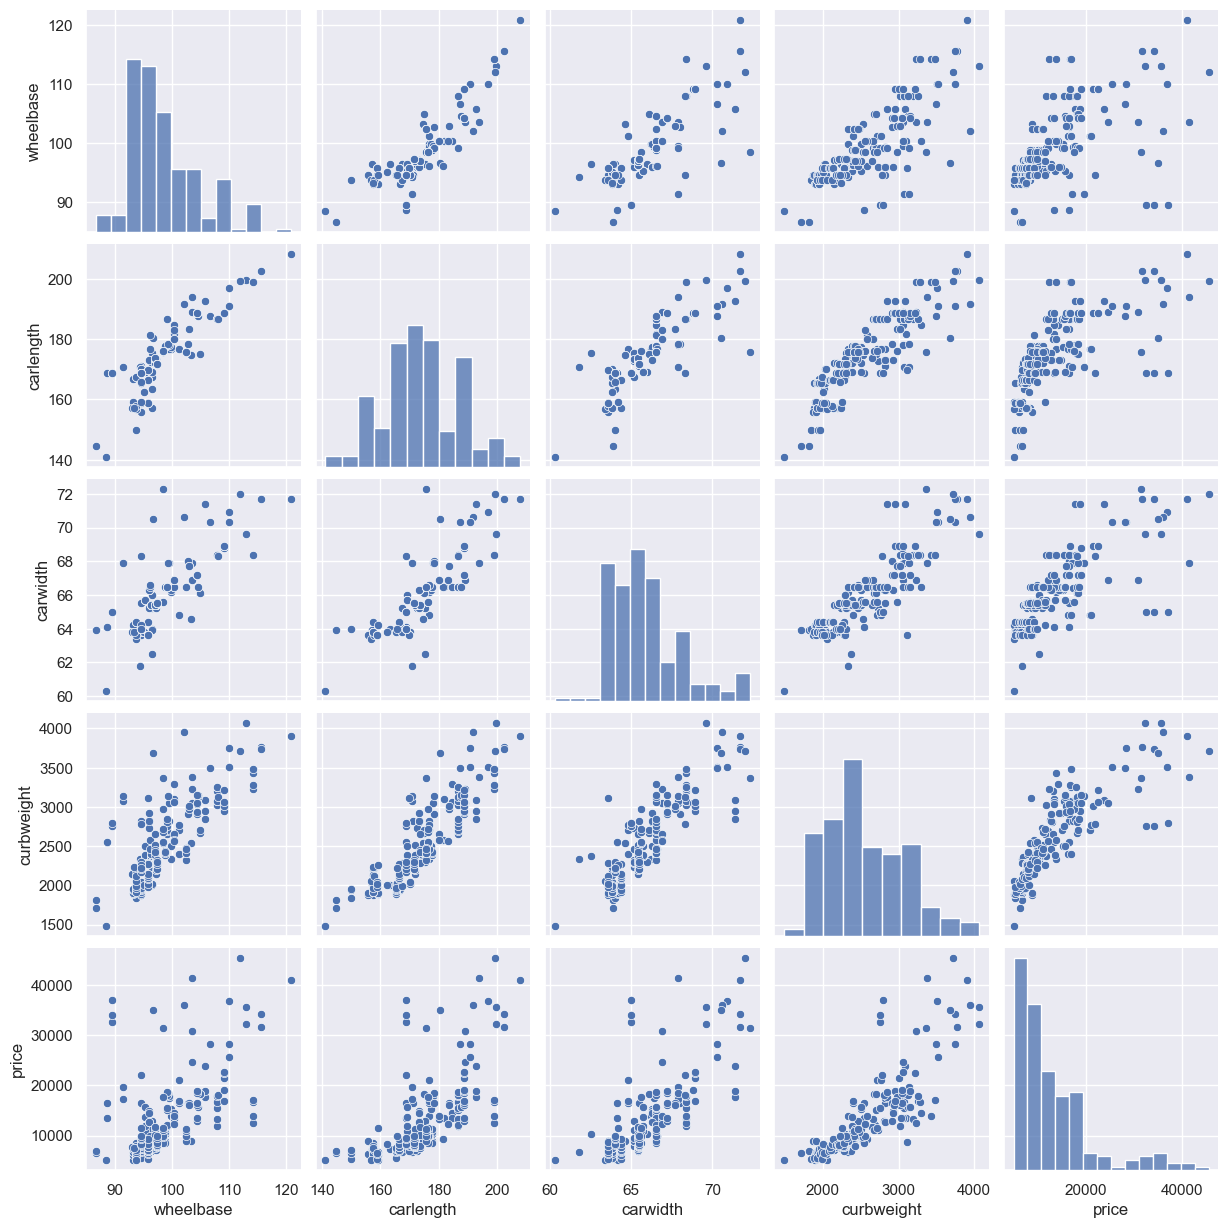

In [73]:
sns.pairplot(data[col])

<Axes: >

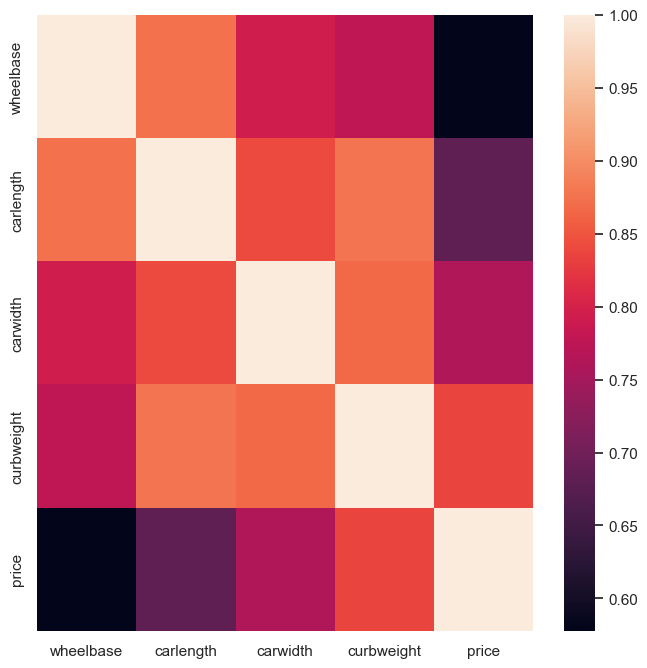

In [100]:
sns.heatmap(data[col].corr())

# Scatter Plot Of Carlength, Curbweight, Highwaympg With Price

In [101]:
col=['carlength','highwaympg','curbweight','price']

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

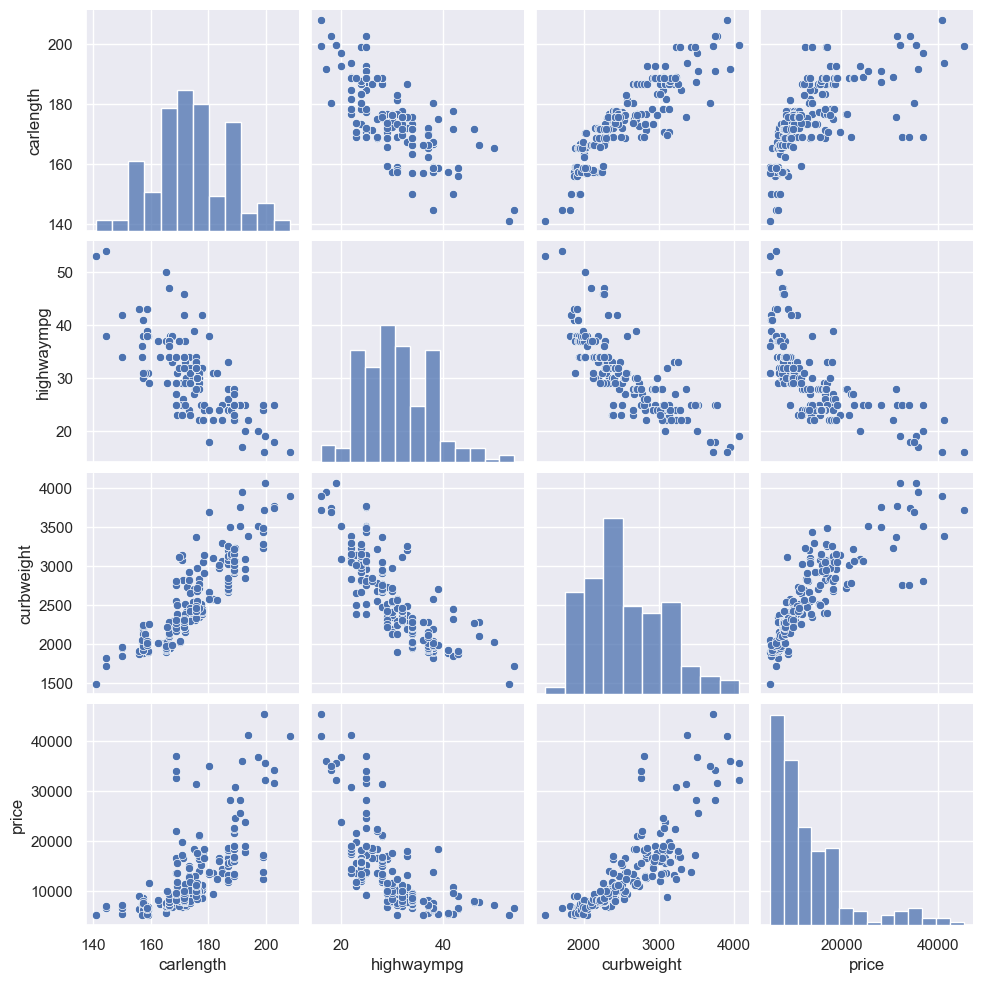

In [76]:
sns.pairplot(data[col])

<Axes: >

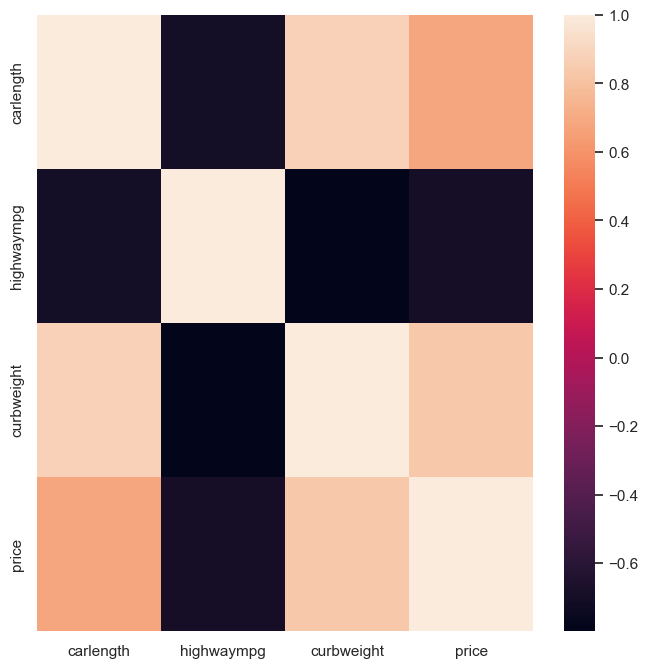

In [102]:
sns.heatmap(data[col].corr())

# Scatter Plot of Carwidth, Curbweight, Engine Size And Price

In [103]:
col=['carwidth','curbweight','enginesize','price']

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

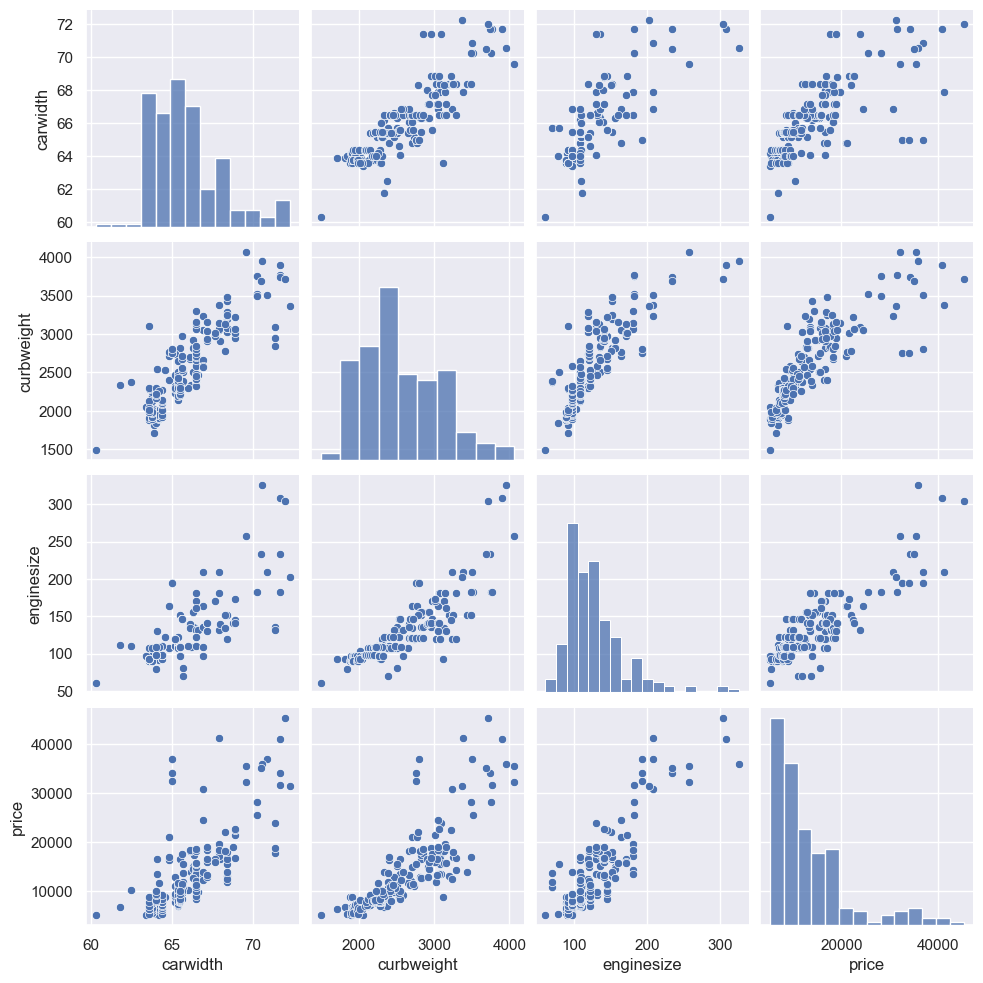

In [79]:
sns.pairplot(data[col])

<Axes: >

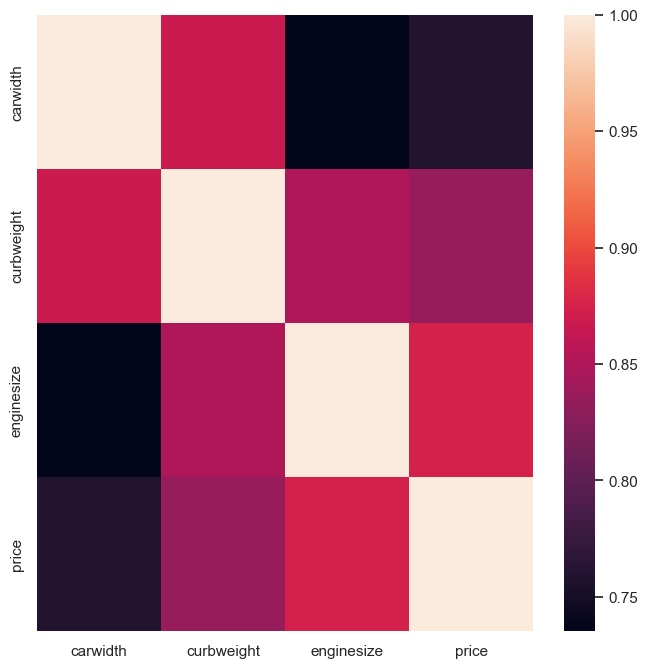

In [104]:
sns.heatmap(data[col].corr())

# Scatter Plot Of Curbweight, Engine Size, Horse Power, Highwaympg And Price

In [105]:
col=['curbweight','enginesize','horsepower','highwaympg','price']

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

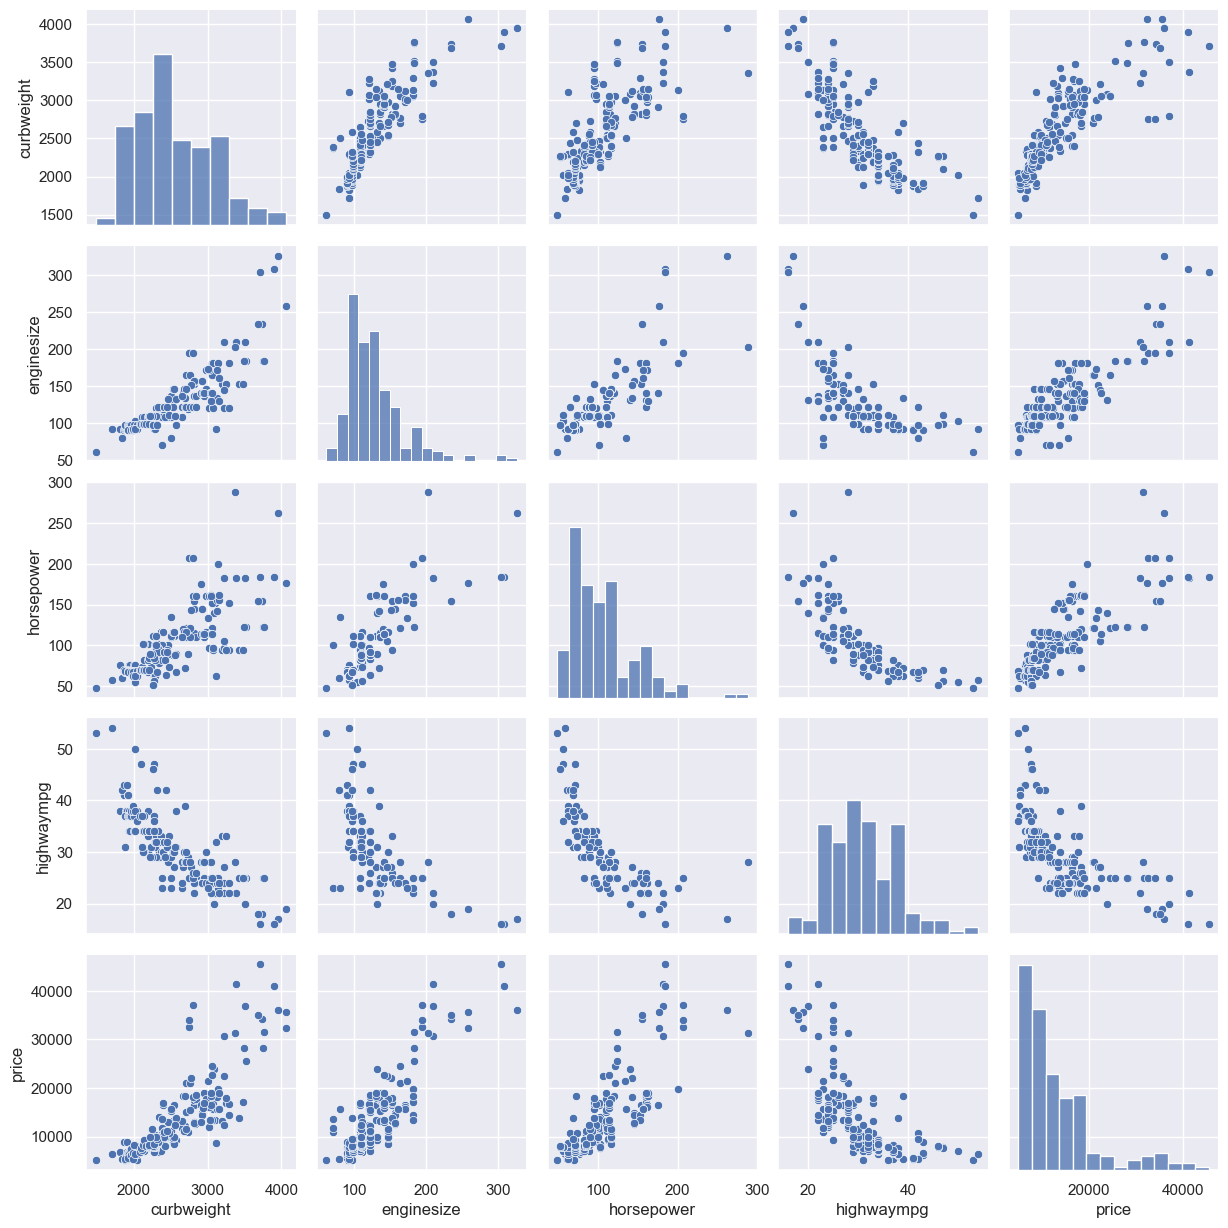

In [82]:
sns.pairplot(data[col])

<Axes: >

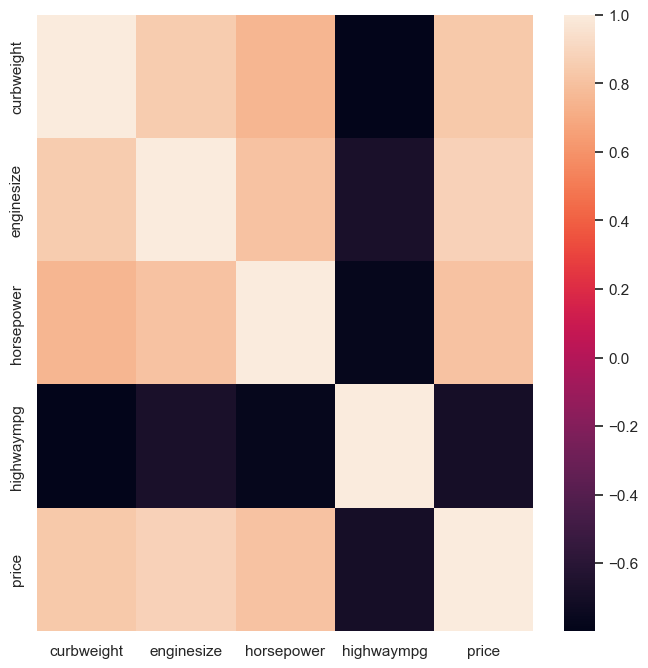

In [106]:
sns.heatmap(data[col].corr())

# Horsepower, Citympg, HighwayMpg And Price

In [107]:
col=['horsepower','citympg','highwaympg','price']

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

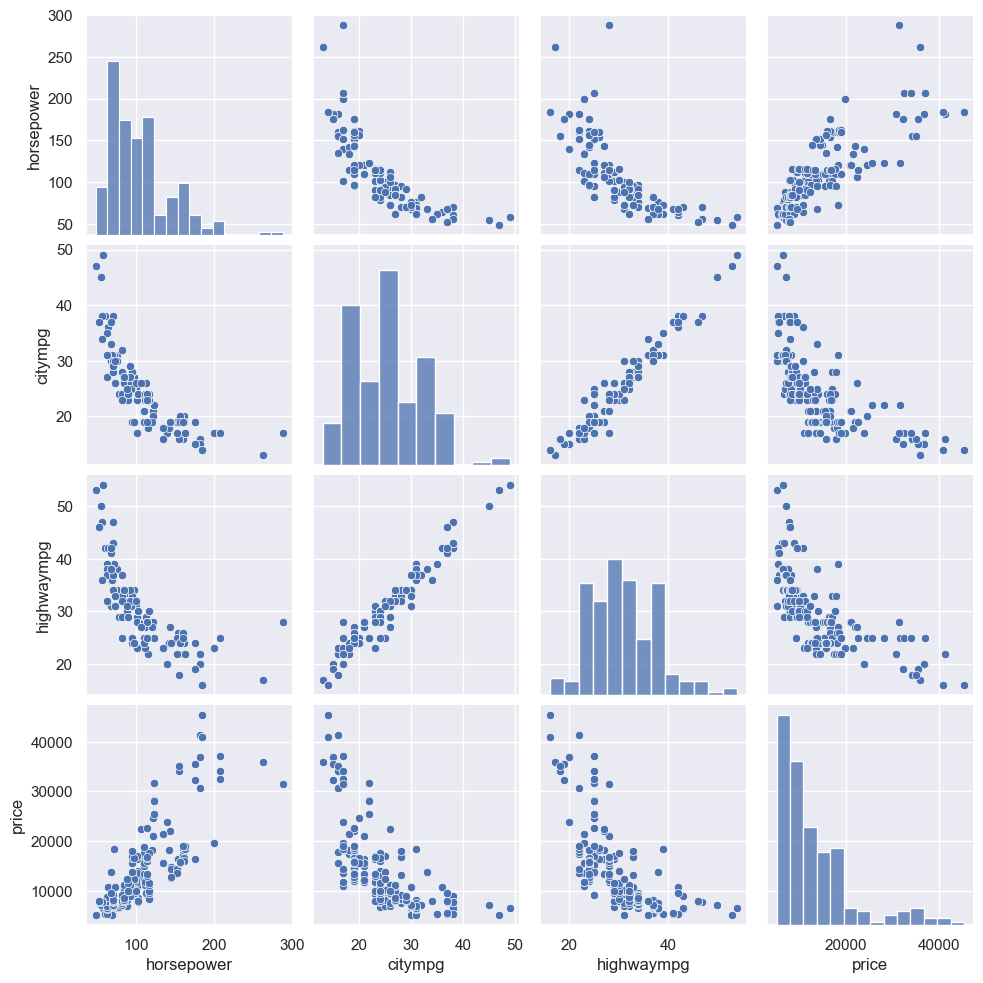

In [85]:
sns.pairplot(data[col])

<Axes: >

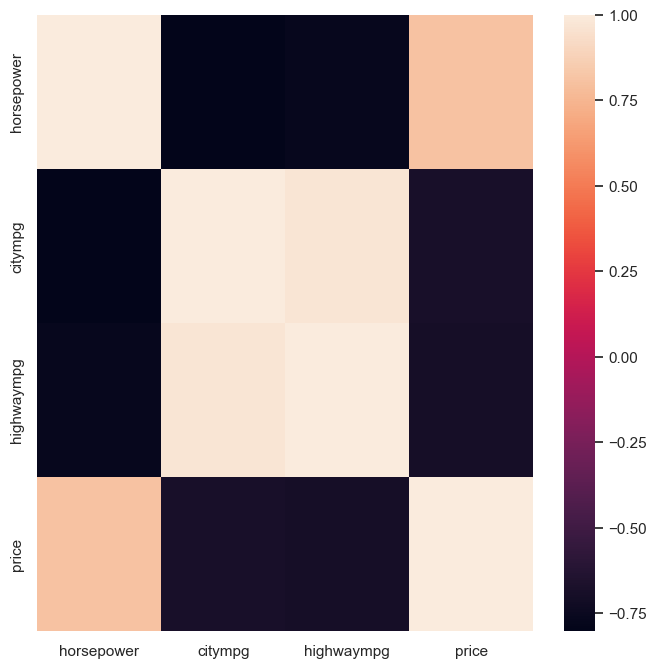

In [108]:
sns.heatmap(data[col].corr())

# Horsepower V/S Car Body Categorized By Carbody

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

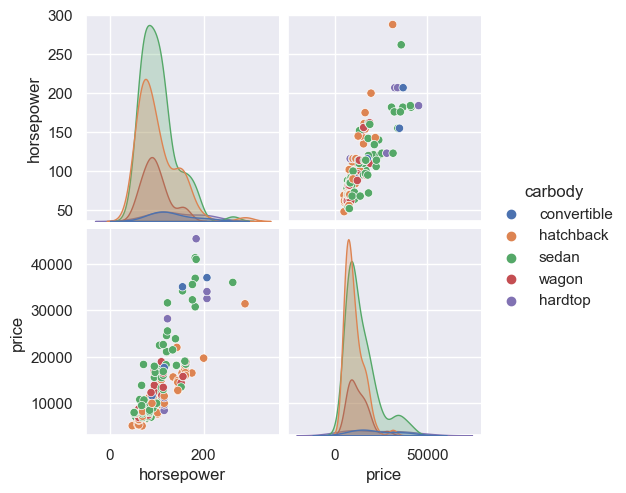

In [109]:
sns.pairplot(data[['horsepower','price','carbody']], hue="carbody");

# Fitting All Features With Price

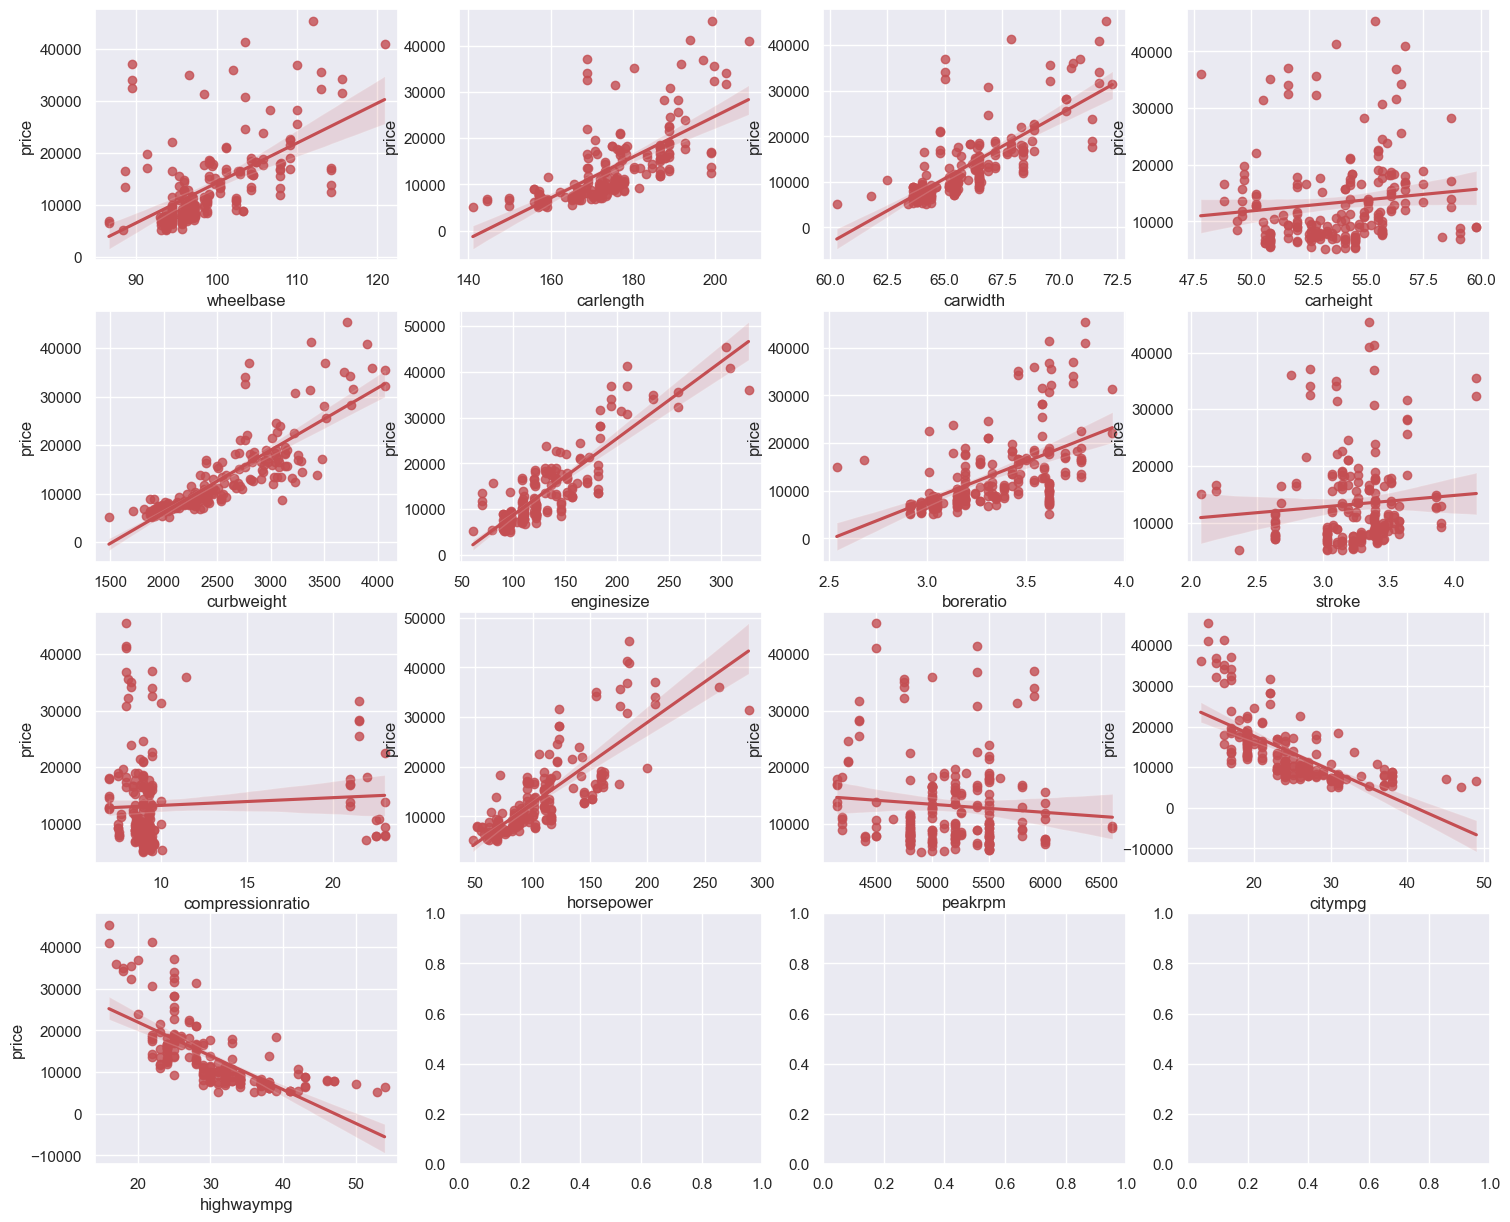

In [110]:
fig,axes = plt.subplots(4,4,figsize=(18,15))
for seg,col in enumerate(numerical_cols[:len(numerical_cols)-1]):
    
    x,y = seg//4,seg%4
    sns.regplot(x=col, y='price' ,data=data,ax=axes[x][y],color='r')


<font size="+3" color='#540b11'><b>3. Feature Selection </b></font>

* Feature selection methods are intended to reduce the number of input variables to those that are believed to be most useful to a model in order to predict the target variable.

In [111]:
X=data[numerical_cols].drop('price',axis=1)
y=data['price']

# Recursive Feature Elimination (RFE) With Random Forest

In [112]:
X = data.apply(lambda col: preprocessing.LabelEncoder().fit_transform(col))
X=X.drop(['CarName','price'],axis=1)
y=data['price']

In [113]:

# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestRegressor()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=15, step=1)
rfe = rfe.fit(X, y)
print('Chosen best 15 feature by rfe:',X.columns[rfe.support_])


Chosen best 15 feature by rfe: Index(['Company', 'carbody', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')


In [114]:
features=list(X.columns[rfe.support_])

<font size="+3" color='#540b11'><b>4. Data Modelling and Evaluation </b></font>

In [115]:
x = X[features]
y = data.price
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)

# Linear Regression

In [116]:
lreg = linear_model.LinearRegression()
lreg.fit(x_train,y_train)
y_train_pred = lreg.predict(x_train)
y_test_pred = lreg.predict(x_test)
lreg.score(x_test,y_test)

0.8034568463752466

# Decision Tree Regressor

In [117]:
dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(x_train,y_train)
y_train_pred = dt_regressor.predict(x_train)
y_test_pred = dt_regressor.predict(x_test)
dt_regressor.score(x_test,y_test)

0.882349745355961

# Random Forest Regressor

In [119]:
Rf = RandomForestRegressor(random_state=0)
Rf.fit(x_train,y_train)
y_train_pred = Rf.predict(x_train)
y_test_pred = Rf.predict(x_test)
Rf.score(x_test,y_test)

0.9068300104214944

In [120]:
pickle.dump(Rf, open('models/DModel.pkl', 'wb'))

# Conclusion

* We applied three models Linear Regression Decision Tree Regressor,and RandomForest Regressor
* As we can see random forest performing best (with accuracy ~ 0.90) and deployment is done using it.



<img src="https://i.pinimg.com/originals/e2/d7/c7/e2d7c71b09ae9041c310cb6b2e2918da.gif">